In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import seaborn as sns

In [69]:
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/submission.csv")

In [70]:
# ID : Information Display 사업부문
# COHA : 사업영역이 Corporate/Office, Hotel/Accommodation
# COEHA : 사업영역이 Corporate/Office, Education, Hotel/Accommodation
# EC : End-Customer, End-User
# CORHA : 사업영역이 Corporate/Office, Retail, Hotel/Accommodation
# D : Display


train.rename(columns=({"bant_submit" : "답변비율",
                       "customer_country" : "고객국적",
                       "business_unit" : "사업부",
                       "com_reg_ver_win_rate" : "기회비율",
                       "customer_idx" : "고객회사명",
                       "customer_type" : "고객유형",
                       "enterprise" : "기업유형",
                       "historical_existing_cnt" : "이전영업전환횟수",
                       "id_strategic_ver" : "ID-COHA여부",
                       "it_strategic_ver" : "IT-COHA여부",
                       "idit_strategic_ver" : "ID&IT-COHA여부",
                       "customer_job" : "고객직업군",
                       "lead_desc_length" : "잠재고객답변길이",
                       "inquiry_type" : "고객문의유형",
                       "product_category" : "요청제품분류",
                       "product_subcategory" : "요청제품하위분류",
                       "product_modelname" : "요청제품모델명",
                       "customer_country.1" : "담당자사지역정보",
                       "customer_position" : "고객회사직책",
                       "response_corporate" : "담당자사법인명",
                       "expected_timeline" : "요청처리일정",
                       "ver_cus" : "COEHAR-EC여부",
                       "ver_pro" : "CORHA-D여부",
                       "ver_win_rate_x" : "사업영역별전환성공비율",
                       "ver_win_ratio_per_bu" : "사업영역별-AS,ID,Sol부문성공전환비율",
                       "business_area" : "고객사업영역",
                       "business_subarea" : "고객사업영역-세부",
                       "lead_owner" : "영업담당자",
                       "is_converted" : "영업성공여부"}), inplace=True)

In [71]:
# ID : Information Display 사업부문
# COHA : 사업영역이 Corporate/Office, Hotel/Accommodation
# COEHA : 사업영역이 Corporate/Office, Education, Hotel/Accommodation
# EC : End-Customer, End-User
# CORHA : 사업영역이 Corporate/Office, Retail, Hotel/Accommodation
# D : Display


test.rename(columns=({"bant_submit" : "답변비율",
                       "customer_country" : "고객국적",
                       "business_unit" : "사업부",
                       "com_reg_ver_win_rate" : "기회비율",
                       "customer_idx" : "고객회사명",
                       "customer_type" : "고객유형",
                       "enterprise" : "기업유형",
                       "historical_existing_cnt" : "이전영업전환횟수",
                       "id_strategic_ver" : "ID-COHA여부",
                       "it_strategic_ver" : "IT-COHA여부",
                       "idit_strategic_ver" : "ID&IT-COHA여부",
                       "customer_job" : "고객직업군",
                       "lead_desc_length" : "잠재고객답변길이",
                       "inquiry_type" : "고객문의유형",
                       "product_category" : "요청제품분류",
                       "product_subcategory" : "요청제품하위분류",
                       "product_modelname" : "요청제품모델명",
                       "customer_country.1" : "담당자사지역정보",
                       "customer_position" : "고객회사직책",
                       "response_corporate" : "담당자사법인명",
                       "expected_timeline" : "요청처리일정",
                       "ver_cus" : "COEHAR-EC여부",
                       "ver_pro" : "CORHA-D여부",
                       "ver_win_rate_x" : "사업영역별전환성공비율",
                       "ver_win_ratio_per_bu" : "사업영역별-AS,ID,Sol부문성공전환비율",
                       "business_area" : "고객사업영역",
                       "business_subarea" : "고객사업영역-세부",
                       "lead_owner" : "영업담당자",
                       "is_converted" : "영업성공여부"}), inplace=True)

In [72]:
def wrangiling(data_set):
    print("==================")
    print("       Shape      ")
    print("==================")

    display(data_set.shape)

    print("==================")
    print("        Info      ")
    print("==================")

    display(data_set.info())

    print("==================")
    print("      Columns     ")
    print("==================")
    
    display(data_set.columns)

    print("==================")
    print("        NaN       ")
    print("==================")

    display(data_set.isna().sum())

    print("==================")
    print("     Duplicated   ")
    print("==================")
    
    display(data_set[data_set.duplicated()])

    print("==================")
    print("    Description   ")
    print("==================")

    display(data_set.describe())

    print("==================")
    print("      Unique      ")
    print("==================")

    display(data_set.nunique())

In [73]:
def unique_cols(data_set):
    for col in data_set.columns[3:]:
        print(f" == {col} ==")
        display(data_set[col].unique())

In [74]:
wrangiling(train)

       Shape      


(59299, 29)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   답변비율                     59299 non-null  float64
 1   고객국적                     58317 non-null  object 
 2   사업부                      59299 non-null  object 
 3   기회비율                     14568 non-null  float64
 4   고객회사명                    59299 non-null  int64  
 5   고객유형                     15338 non-null  object 
 6   기업유형                     59299 non-null  object 
 7   이전영업전환횟수                 13756 non-null  float64
 8   ID-COHA여부                3444 non-null   float64
 9   IT-COHA여부                1121 non-null   float64
 10  ID&IT-COHA여부             4565 non-null   float64
 11  고객직업군                    40566 non-null  object 
 12  잠재고객답변길이                 59299 non-null  int64  
 13  고객문의유형                   58358 non-null  object 
 14  요청제

None

      Columns     


Index(['답변비율', '고객국적', '사업부', '기회비율', '고객회사명', '고객유형', '기업유형', '이전영업전환횟수',
       'ID-COHA여부', 'IT-COHA여부', 'ID&IT-COHA여부', '고객직업군', '잠재고객답변길이', '고객문의유형',
       '요청제품분류', '요청제품하위분류', '요청제품모델명', '담당자사지역정보', '고객회사직책', '담당자사법인명',
       '요청처리일정', 'COEHAR-EC여부', 'CORHA-D여부', '사업영역별전환성공비율',
       '사업영역별-AS,ID,Sol부문성공전환비율', '고객사업영역', '고객사업영역-세부', '영업담당자', '영업성공여부'],
      dtype='object')

        NaN       


답변비율                           0
고객국적                         982
사업부                            0
기회비율                       44731
고객회사명                          0
고객유형                       43961
기업유형                           0
이전영업전환횟수                   45543
ID-COHA여부                  55855
IT-COHA여부                  58178
ID&IT-COHA여부               54734
고객직업군                      18733
잠재고객답변길이                       0
고객문의유형                       941
요청제품분류                     19374
요청제품하위분류                   50064
요청제품모델명                    50070
담당자사지역정보                     982
고객회사직책                         0
담당자사법인명                        0
요청처리일정                     30863
COEHAR-EC여부                    0
CORHA-D여부                      0
사업영역별전환성공비율                40882
사업영역별-AS,ID,Sol부문성공전환비율    43995
고객사업영역                     40882
고객사업영역-세부                  53773
영업담당자                          0
영업성공여부                         0
dtype: int64

     Duplicated   


답변비율                       고객국적 사업부      기회비율  고객회사명  \
320    1.00  /East London/South Africa  AS  0.040816  30958   
322    1.00  /East London/South Africa  AS  0.040816  30958   
344    1.00        /Medellin /Colombia  AS  0.003937  39065   
1253   1.00        /Brisbane/Australia  ID  0.084337  14526   
1314   1.00                    //Ghana  ID  0.075000   4705   
...     ...                        ...  ..       ...    ...   
59134  0.75                   //Mexico  ID  0.042254  33676   
59262  1.00    /rio de janeiro /Brazil  AS  0.040000  13618   
59275  1.00              /Temuco/Chile  AS  0.040000  22100   
59290  0.75       /Dolnośląskie/Poland  AS       NaN   6739   
59294  1.00            /Sląskie/Poland  AS       NaN  33747   

                         고객유형        기업유형  이전영업전환횟수  ID-COHA여부  IT-COHA여부  \
320              End-Customer         SMB       NaN        NaN        NaN   
322              End Customer         SMB       NaN        NaN        NaN   
344                       NaN         SMB       0.0        NaN        NaN   
1253                      NaN  Enterprise       NaN        1.0        NaN   
1314   Specifier / Influencer         SMB       NaN        1.0        NaN   
...                       ...         ...       ...        ...        ...   
59134                     NaN         SMB       NaN        NaN        NaN   
59262   Specifier/ Influencer  Enterprise       NaN        NaN        NaN   
59275   Specifier/ Influencer  Enterprise       0.0        NaN        NaN   
59290   Specifier/ Influencer         SMB       NaN        NaN        NaN   
59294            End Customer         SMB       NaN        NaN        NaN   

       ...  담당자사법인명               요청처리일정  COEHAR-EC여부 CORHA-D여부 사업영역별전환성공비율  \
320    ...    LGESA     more than a year            1         0    0.003079   
322    ...    LGESA     more than a year            1         0    0.003079   
344    ...    LGECB    9 months ~ 1 year            0         0    0.003079   
1253   ...    LGEAP   less than 3 months            0         1    0.003079   
1314   ...    LGEAF   less than 3 months            0         1    0.003079   
...    ...      ...                  ...          ...       ...         ...   
59134  ...    LGEMS   less than 3 months            0         0    0.000026   
59262  ...    LGESP     more than a year            0         0    0.000026   
59275  ...    LGECL   less than 3 months            0         0    0.000026   
59290  ...    LGEPL   less than 3 months            0         0    0.000026   
59294  ...    LGEPL  3 months ~ 6 months            0         0    0.000026   

      사업영역별-AS,ID,Sol부문성공전환비율              고객사업영역          고객사업영역-세부 영업담당자  \
320                  0.026846  corporate / office        IT/Software    26   
322                  0.026846  corporate / office        IT/Software    26   
344                  0.026846  corporate / office                NaN    41   
1253                 0.064566  corporate / office                NaN   306   
1314                 0.064566  corporate / office  Telecommunication   170   
...                       ...                 ...                ...   ...   
59134                0.031579     public facility                NaN   214   
59262                0.028777     public facility   Museum / Gallery    97   
59275                0.028777     public facility             Others   100   
59290                0.028777     public facility             Others   694   
59294                0.028777     public facility             Others   694   

      영업성공여부  
320    False  
322    False  
344    False  
1253   False  
1314   False  
...      ...  
59134   True  
59262  False  
59275  False  
59290  False  
59294  False  

[3519 rows x 29 columns]

    Description   


답변비율          기회비율         고객회사명      이전영업전환횟수  ID-COHA여부  \
count  59299.000000  14568.000000  59299.000000  13756.000000     3444.0   
mean       0.634593      0.091685  27114.556333     19.912184        1.0   
std        0.286066      0.150988  14653.911888     44.697938        0.0   
min        0.000000      0.003788      2.000000      0.000000        1.0   
25%        0.500000      0.019900  14913.000000      1.000000        1.0   
50%        0.500000      0.049180  26774.000000      4.000000        1.0   
75%        1.000000      0.074949  40368.500000     19.000000        1.0   
max        1.000000      1.000000  47466.000000   1394.000000        1.0   

       IT-COHA여부  ID&IT-COHA여부      잠재고객답변길이   COEHAR-EC여부     CORHA-D여부  \
count     1121.0        4565.0  59299.000000  59299.000000  59299.000000   
mean         1.0           1.0     79.271590      0.041603      0.050810   
std          0.0           0.0    132.551067      0.199681      0.219612   
min          1.0           1.0      1.000000      0.000000      0.000000   
25%          1.0           1.0      7.000000      0.000000      0.000000   
50%          1.0           1.0     29.000000      0.000000      0.000000   
75%          1.0           1.0     92.000000      0.000000      0.000000   
max          1.0           1.0   1264.000000      1.000000      1.000000   

        사업영역별전환성공비율  사업영역별-AS,ID,Sol부문성공전환비율         영업담당자  
count  18417.000000             15304.000000  59299.000000  
mean       0.001117                 0.049288    262.563888  
std        0.001104                 0.027949    231.605681  
min        0.000002                 0.011583      0.000000  
25%        0.000298                 0.026846     97.000000  
50%        0.000572                 0.049840    175.000000  
75%        0.001183                 0.064566    374.000000  
max        0.003079                 0.285714   1114.000000

      Unique      


답변비율                           5
고객국적                       15399
사업부                            5
기회비율                          80
고객회사명                      35112
고객유형                          33
기업유형                           2
이전영업전환횟수                     136
ID-COHA여부                      1
IT-COHA여부                      1
ID&IT-COHA여부                   1
고객직업군                        560
잠재고객답변길이                     909
고객문의유형                        71
요청제품분류                       357
요청제품하위분류                     330
요청제품모델명                      665
담당자사지역정보                   15399
고객회사직책                       117
담당자사법인명                       53
요청처리일정                       449
COEHAR-EC여부                    2
CORHA-D여부                      2
사업영역별전환성공비율                   12
사업영역별-AS,ID,Sol부문성공전환비율       23
고객사업영역                        12
고객사업영역-세부                     86
영업담당자                        984
영업성공여부                         2
dtype: int64

In [75]:
wrangiling(test)

       Shape      


(5271, 30)

        Info      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5271 non-null   int64  
 1   답변비율                     5271 non-null   float64
 2   고객국적                     5271 non-null   object 
 3   사업부                      5271 non-null   object 
 4   기회비율                     1788 non-null   float64
 5   고객회사명                    5271 non-null   int64  
 6   고객유형                     3814 non-null   object 
 7   기업유형                     5271 non-null   object 
 8   이전영업전환횟수                 1275 non-null   float64
 9   ID-COHA여부                593 non-null    float64
 10  IT-COHA여부                53 non-null     float64
 11  ID&IT-COHA여부             646 non-null    float64
 12  고객직업군                    3832 non-null   object 
 13  잠재고객답변길이                 5271 non-null   int64  
 14  고객문의유

None

      Columns     


Index(['id', '답변비율', '고객국적', '사업부', '기회비율', '고객회사명', '고객유형', '기업유형',
       '이전영업전환횟수', 'ID-COHA여부', 'IT-COHA여부', 'ID&IT-COHA여부', '고객직업군',
       '잠재고객답변길이', '고객문의유형', '요청제품분류', '요청제품하위분류', '요청제품모델명', '담당자사지역정보',
       '고객회사직책', '담당자사법인명', '요청처리일정', 'COEHAR-EC여부', 'CORHA-D여부',
       '사업영역별전환성공비율', '사업영역별-AS,ID,Sol부문성공전환비율', '고객사업영역', '고객사업영역-세부',
       '영업담당자', '영업성공여부'],
      dtype='object')

        NaN       


id                            0
답변비율                          0
고객국적                          0
사업부                           0
기회비율                       3483
고객회사명                         0
고객유형                       1457
기업유형                          0
이전영업전환횟수                   3996
ID-COHA여부                  4678
IT-COHA여부                  5218
ID&IT-COHA여부               4625
고객직업군                      1439
잠재고객답변길이                      0
고객문의유형                     1292
요청제품분류                     1858
요청제품하위분류                   4478
요청제품모델명                    4709
담당자사지역정보                      0
고객회사직책                        0
담당자사법인명                       0
요청처리일정                     2408
COEHAR-EC여부                   0
CORHA-D여부                     0
사업영역별전환성공비율                2898
사업영역별-AS,ID,Sol부문성공전환비율    3365
고객사업영역                     2898
고객사업영역-세부                  3455
영업담당자                         0
영업성공여부                     5271
dtype: int64

     Duplicated   


Empty DataFrame
Columns: [id, 답변비율, 고객국적, 사업부, 기회비율, 고객회사명, 고객유형, 기업유형, 이전영업전환횟수, ID-COHA여부, IT-COHA여부, ID&IT-COHA여부, 고객직업군, 잠재고객답변길이, 고객문의유형, 요청제품분류, 요청제품하위분류, 요청제품모델명, 담당자사지역정보, 고객회사직책, 담당자사법인명, 요청처리일정, COEHAR-EC여부, CORHA-D여부, 사업영역별전환성공비율, 사업영역별-AS,ID,Sol부문성공전환비율, 고객사업영역, 고객사업영역-세부, 영업담당자, 영업성공여부]
Index: []

[0 rows x 30 columns]

    Description   


id         답변비율         기회비율         고객회사명     이전영업전환횟수  \
count   5271.000000  5271.000000  1788.000000   5271.000000  1275.000000   
mean   10686.395940     0.605720     0.102336  24664.497629    21.272941   
std     6141.012698     0.365631     0.151790  14615.896802    75.187401   
min        1.000000     0.000000     0.003788      1.000000     0.000000   
25%     5644.000000     0.250000     0.032787  11173.500000     0.000000   
50%    10067.000000     0.500000     0.053892  24151.000000     4.000000   
75%    16019.500000     1.000000     0.075000  37680.000000    19.000000   
max    21340.000000     1.000000     1.000000  47466.000000  2219.000000   

       ID-COHA여부  IT-COHA여부  ID&IT-COHA여부     잠재고객답변길이  COEHAR-EC여부  \
count      593.0       53.0         646.0  5271.000000  5271.000000   
mean         1.0        1.0           1.0    81.816164     0.146841   
std          0.0        0.0           0.0   135.063265     0.353981   
min          1.0        1.0           1.0     1.000000     0.000000   
25%          1.0        1.0           1.0     3.000000     0.000000   
50%          1.0        1.0           1.0    26.000000     0.000000   
75%          1.0        1.0           1.0   104.000000     0.000000   
max          1.0        1.0           1.0  1143.000000     1.000000   

         CORHA-D여부  사업영역별전환성공비율  사업영역별-AS,ID,Sol부문성공전환비율        영업담당자  영업성공여부  
count  5271.000000  2373.000000              1906.000000  5271.000000     0.0  
mean      0.081389     0.001093                 0.058388   304.458736     NaN  
std       0.273457     0.001189                 0.035738   241.502331     NaN  
min       0.000000     0.000002                 0.011583     0.000000     NaN  
25%       0.000000     0.000060                 0.048630    97.000000     NaN  
50%       0.000000     0.000572                 0.053571   231.000000     NaN  
75%       0.000000     0.001183                 0.064566   428.000000     NaN  
max       1.000000     0.003079                 0.285714  1108.000000     NaN

      Unique      


id                         5271
답변비율                          5
고객국적                       2467
사업부                           3
기회비율                         77
고객회사명                      4069
고객유형                          7
기업유형                          2
이전영업전환횟수                     74
ID-COHA여부                     1
IT-COHA여부                     1
ID&IT-COHA여부                  1
고객직업군                        41
잠재고객답변길이                    481
고객문의유형                       15
요청제품분류                       33
요청제품하위분류                    150
요청제품모델명                     190
담당자사지역정보                   2467
고객회사직책                       23
담당자사법인명                      41
요청처리일정                        5
COEHAR-EC여부                   2
CORHA-D여부                     2
사업영역별전환성공비율                  12
사업영역별-AS,ID,Sol부문성공전환비율      22
고객사업영역                       12
고객사업영역-세부                    80
영업담당자                       440
영업성공여부                        0
dtype: int64

In [76]:
unique_cols(train)

 == 기회비율 ==


array([0.06666667, 0.08888889, 0.04081633, 0.00393701,        nan,
       0.05753425, 0.075     , 0.04464286, 0.08433735, 0.0199005 ,
       0.07494867, 0.04347826, 0.03119584, 0.14705882, 0.03305785,
       0.08069164, 0.33333333, 0.04310345, 0.11627907, 0.01351351,
       0.04854369, 0.01818182, 0.01185771, 0.21428571, 0.3902439 ,
       0.03225806, 0.01754386, 0.03278689, 0.05555556, 0.01515152,
       0.46153846, 0.06818182, 0.08333333, 0.26923077, 0.18181818,
       0.23076923, 0.64285714, 0.16666667, 0.01724138, 0.05389222,
       0.04968944, 0.01098901, 0.06779661, 0.03703704, 0.00378788,
       0.36363636, 0.10526316, 0.61538462, 0.08695652, 0.05442177,
       0.05319149, 0.07142857, 0.04      , 0.04166667, 0.02892562,
       0.11842105, 0.04918033, 0.11864407, 0.07324841, 0.02898551,
       0.01960784, 0.02272727, 0.004     , 0.125     , 0.01694915,
       0.12412178, 0.13636364, 0.02020202, 0.11363636, 0.03603604,
       0.06956522, 0.5       , 1.        , 0.25      , 0.44444

 == 고객회사명 ==


array([32160, 23122,  1755, ..., 19249, 40327, 30268])

 == 고객유형 ==


array(['End-Customer', 'Specifier/ Influencer', 'Service Partner',
       'Channel Partner', nan, 'Corporate', 'End Customer',
       'Specifier / Influencer', 'Solution Eco-Partner', 'Distributor',
       'Other', 'System Integrator', 'Consultant', 'Installer',
       'Homeowner', 'Others', 'Technician', 'Installer/Contractor',
       'Engineer', 'Manager / Director', 'Developer', 'Etc.',
       'Architect/Consultant', 'End-user', 'HVAC Engineer', 'Reseller',
       'Software/Solution Provider', 'Software / Solution Provider',
       'Dealer/Distributor', 'Technical Assistant', 'Commercial end-user',
       'Interior Designer', 'Home Owner', 'Administrator'], dtype=object)

 == 기업유형 ==


array(['Enterprise', 'SMB'], dtype=object)

 == 이전영업전환횟수 ==


array([      nan, 1.200e+01, 1.440e+02, 3.000e+00, 2.300e+01, 4.700e+01,
       0.000e+00, 1.000e+00, 1.900e+01, 4.200e+01, 7.500e+01, 1.700e+01,
       2.000e+01, 5.000e+00, 2.000e+00, 1.150e+02, 4.000e+00, 1.600e+01,
       6.000e+00, 3.100e+01, 4.900e+01, 1.000e+01, 1.100e+01, 4.000e+01,
       7.000e+00, 6.100e+01, 4.500e+01, 5.700e+01, 1.750e+02, 1.300e+01,
       9.900e+01, 1.500e+01, 8.000e+00, 2.100e+01, 5.600e+01, 6.660e+02,
       1.220e+02, 3.240e+02, 2.200e+01, 8.000e+01, 3.600e+01, 2.800e+01,
       1.720e+02, 6.600e+01, 3.200e+01, 5.300e+01, 3.800e+01, 1.890e+02,
       5.800e+01, 2.700e+01, 1.060e+02, 1.680e+02, 9.000e+00, 4.600e+01,
       4.800e+01, 5.200e+01, 7.300e+01, 9.200e+01, 6.000e+01, 3.900e+01,
       1.800e+01, 1.400e+01, 2.120e+02, 4.720e+02, 3.900e+02, 6.900e+01,
       2.330e+02, 2.900e+01, 3.000e+01, 2.400e+01, 7.800e+01, 1.070e+02,
       4.100e+01, 1.660e+02, 5.900e+01, 4.400e+01, 1.140e+02, 3.700e+01,
       3.500e+01, 1.580e+02, 8.500e+01, 7.700e+01, 

 == ID-COHA여부 ==


array([nan,  1.])

 == IT-COHA여부 ==


array([nan,  1.])

 == ID&IT-COHA여부 ==


array([nan,  1.])

 == 고객직업군 ==


array(['purchasing', 'media and communication', 'engineering',
       'entrepreneurship', 'consulting', 'program and project management',
       'sales', 'other', 'operations', nan, 'administrative',
       'business development', 'information technology', 'accounting',
       'education', 'healthcare services', 'human resources', 'support',
       'finance', 'marketing', 'legal', 'quality assurance',
       'arts and design', 'real estate',
       'military and protective services', 'research',
       'product management', 'bidder', 'community and social services',
       'research/install', 'project manager', 'technical', 'details send',
       'architect', 'curation', 'developer/property',
       'radiology professional', 'graphic/color art',
       'medical imaging specialist', 'medical solution provider',
       'manager', 'owner', 'designer', 'recommend',
       'consultant / purchaser', 'system installer',
       'technical advisor, reseller', 'director it', 'execution',
       

 == 잠재고객답변길이 ==


array([  62,   96,   56,   44,   97, 1114,  420,  205,  103,  252,   90,
         84,   67,  210,   46,  166,  129,    3,   57,   80,   43,  407,
         75,   66,   71,  113,  133,  142,   76,  334,  197,   33,  171,
         69,   30,  181,   63,  199,  167,   32,   26,   37,   68,   23,
         82,  526,   38,   41,   35,   77,  137,   13,    9,    1,    2,
         12,    8,  283,  164,   85,   94,  203,  109,   29,   17,  146,
        127,   14,   89,  285,  267,  143,  253,  300,   21,  141,   60,
        214,  139,   54,  632,  264,   86,  104,   49,   61,   24,  151,
        198,   11,  162,  389,  119,  155,  222,  116,  180,  218,   65,
        235,  154,  360,  189,  156,  114,   99,  306, 1072,  238,    6,
         47,   18,   98,  328,  282,  191,   52,  357,  313,  451,  212,
        280,   34,  165,  111,  115,  120,   88,  217,  365,  134,  172,
        100,  230,  101,  219,   50,   31,  216,  152,  319,   95,   58,
         79,   39,   73,  126,   40,  223,   22,   

 == 고객문의유형 ==


array(['Quotation or purchase consultation', 'Product Information',
       'Quotation or Purchase Consultation', 'Other',
       'Usage or technical consultation', 'Trainings', 'Services',
       'Sales Inquiry', 'Etc.', 'Technical Support',
       'Usage or Technical Consultation', 'Technical Consultation',
       'Request for Partnership', nan, 'sales', 'technical',
       'usage or technical consultation',
       'usage_or_technical_consultation', 'other',
       'quotation_or_purchase_consultation', 'other_', 'Request a Demo',
       'Request for Distributorship', 'Request for quotation or purchase',
       'Request for technical consulting', '(Select ID_Needs)',
       'One Quick:Flex', 'AIO', 'Needs', 'Purchase',
       'technical_consultation', 'Customer Suggestions', 'Event Inquiry',
       'Others', 'OEM/ODM Request', 'Hospital TV', 'others',
       'i want to know the details about it', 'EDUCATIONAL EQUIPMENTS',
       'Digital platform', 'TV interactive', 'teach',
       'Di

 == 요청제품분류 ==


array(['multi-split', 'single-split', 'vrf', 'chiller', 'etc.', 'rac',
       'teto ou cassete inverter', nan, 'software solution',
       'all lg vrf systems', 'ventilation',
       'a thermodynamic water heater', 'residential air conditioner',
       'outros', 'heating', 'multi v5 vrf', 'split tunggal',
       'multi inverter', 'חימום', 'standard signage',
       'high brightness signage', 'interactive signage',
       'video wall signage', 'led signage', 'hotel tv',
       'signage care solution', 'oled signage', 'idb', 'video wall',
       'one:quick series', 'commercial tv', 'lg one:quick',
       'special signage', 'other', 'accessories', 'commercial display',
       'interactive digital board', 'standard', 'uhd signage',
       'smart tv signage', 'lg one:quick series', 'pro:centric', 'ur640',
       'ur640s', 'webos', 'signage care solutions', 'aio | one quick',
       'high brightness', 'hospital tv', 'digital signage', 'monitor',
       'pc', 'laptop', 'projector', 'cloud dev

 == 요청제품하위분류 ==


array([nan, 'New High Haze UHD Standard Signage', 'Window Facing Display',
       'LG CreateBoard', 'UR640S Series', 'TR3DJ Series',
       'webOS UHD Signage', 'TN3F Series', 'SM3G Series',
       '55" 500 nits FHD 0.44mm Even Bezel Video Wall', 'UH5F-H Series',
       'Interactive Digital Board', 'Createboard', 'UHD TV Signage',
       '55" 700 nits FHD 0.44mm Even Bezel Video Wall', 'LT340C Series',
       'Ultra Narrow Bezel Video Wall', 'Fine-pitch Essential Series',
       'UT640S Series', 'Outdoor Display', 'TR3BG Series',
       'SuperSign CMS', 'Touch Open Frame', 'LT341H Series',
       'Total Care Solution', 'Ultra Slim Series', 'LG MAGNIT',
       'Wallpaper OLED Signage', 'Indoor Versatile Series', 'VL5F Series',
       'Transparent OLED', 'TA3E Series', 'OneQuick Flex', 'UL3J',
       'Compact Series', 'TR3BF Series', '4K UHD Smart TV',
       'Transparent LED Film', 'One:Quick Flex',
       'One:Quick Works for Zoom Rooms', 'Transparent OLED Signage',
       'LG Simple E

 == 요청제품모델명 ==


array([nan, '98UH5J-H', '75XS4G', '86TR3DK', '43UR640S', '86TR3DJ',
       '75UL3J-B', '22SM3G-B', '55VSM5J', '55UH5F-H', '75TC3D', '86TR3PJ',
       '65UR640S (ASIA)', '55VSH7J', '43LT340C (EU)', '55LV77D',
       'LAS009-F', '55UT640S (ASIA)', '98TR3PJ', '75TR3DJ', '55TR3BG',
       '65TR3DK', '43TNF5J', '43LT341H (EU)', '55UL3J-B',
       '55UR640S (EU/CIS)', '55UR640S', 'LSAB009', 'LSCA039', '55VL5F-A',
       '55EW5G', '43TA3E', '43HT3WJ', '43UL3J', '86TR3E', '65TR3BF-B',
       '65UQ801C (INDIA)', '32LT340C', 'LAT140', 'LSCB018', '55CT5WJ-ZJ',
       '55EW5PG-S', '55VH7B', '86UH5J-H', '55EW5TK-A', '32SM5J-B',
       '55VL7F-A', '49VL5G-M', '55CT5WJ', '65TR3DJ', '32SM5J', '65EV5E',
       '55VL5F', '55TC3CD', '110UM5J', '49XE4F-M', '75UH5J-H', '55EW5G-V',
       '49VL5G', '49VL5F-A', '49VL5PJ', '55LV75D', '55XS4J-B', '55VM5J-H',
       'SC-00DA', '85TR3BF', '55VX1D', '49LT560H (NA)',
       'LG SuperSign CMS', '55UH5F-B', '55LV35A', '55EF5G-P', '49LT340C',
       '55SVH7F', '32TA3

 == 담당자사지역정보 ==


array(['/Quezon City/Philippines', '/PH-00/Philippines',
       '/Kolkata /India', ..., '/Pisco/Peru', '/santa cruz bolivia/Peru',
       '/paris/France'], dtype=object)

 == 고객회사직책 ==


array(['entry level', 'ceo/founder', 'partner', 'manager',
       'vice president', 'associate/analyst', 'c-level executive', 'none',
       'director', 'other', 'intern', 'trainee', 'others',
       'this is a consume display requirement for home purpose.',
       'vicepresident', 'consulting', 'entrylevel', 'c-levelexecutive',
       'unpaid', 'physics teacher', 'assistant professor',
       'av management', 'maths lecturer', 'founder', 'engineering',
       'installer', 'homeowner', 'consultant', 'commercial end-user',
       'employee', 'bulgaria', 'lider de desarrollo', 'administrative',
       'entrepreneurship', 'decision-influencer', 'decision maker',
       'customer', 'not applicable', 'decision-maker', 'no influence',
       'commercial consultant', 'science teacher', 'decision influencer',
       'technical', 'architecture/consult', 'architect/consultant',
       'exhibition', 'hospital', 'end-user', 'government', 'manufacturer',
       'software /solution provider', 'syste

 == 담당자사법인명 ==


array(['LGEPH', 'LGEIL', 'LGEAF', 'LGESJ', 'LGESL', 'LGESP', 'LGEGF',
       'LGESA', 'LGEUS', 'LGECB', 'LGEMS', 'LGEEG', 'LGEEF', 'LGEAP',
       'LGEIN', 'LGEUK', 'LGEKR', 'LGEPS', 'LGECI', 'LGECL', 'LGETK',
       'LGELF', 'LGEPT', 'LGEPR', 'LGEDG', 'LGERO', 'LGEMK', 'LGEPL',
       'LGECZ', 'LGEES', 'LGEAR', 'LGEHK', 'LGEML', 'LGEJP', 'LGEHS',
       'LGEAS', 'LGEYK', 'LGEIS', 'LGEBN', 'LGEFS', 'LGESW', 'LGEMC',
       'LGEAG', 'LGEEB', 'LGETH', 'LGEVH', 'LGECH', 'LGELA', 'LGETT',
       'LGERA', 'LGEUR', 'LGEIR', 'LGEBT'], dtype=object)

 == 요청처리일정 ==


array(['less than 3 months', nan, '3 months ~ 6 months',
       '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months',
       'quote has been sent to customer.',
       'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.',
       'already close in july purchse with rd',
       'client not interested in product.. receing call and not answering properly',
       'being followed up', 'being followed up.',
       'repeated inquiry from client. he was just inquiring but have not confimred on purchase. we have tried mulitple times but client is not interested in buying.',
       'update- 7th aug--demo given. customer will confirm next week',
       "tried to reach him multipe times from last 7 days but couldn't get through",
       'details send', 'discused with ankit in dehli',
       'requires detail for tender. no purchase requirement right now.',
       'partner is into static signages. he need to connec

 == COEHAR-EC여부 ==


array([1, 0])

 == CORHA-D여부 ==


array([0, 1])

 == 사업영역별전환성공비율 ==


array([3.07928766e-03,            nan, 5.71955128e-04, 7.16773438e-04,
       6.04403367e-05, 5.43222432e-04, 2.98310405e-04, 9.65915661e-05,
       1.18272889e-03, 2.15363418e-04, 2.31593813e-06, 1.27659029e-05,
       2.58895523e-05])

 == 사업영역별-AS,ID,Sol부문성공전환비율 ==


array([0.02684564,        nan, 0.06456612, 0.03448276, 0.04862953,
       0.05147059, 0.06407035, 0.02263374, 0.12857143, 0.13114754,
       0.03548387, 0.02012072, 0.07941176, 0.02272727, 0.04984026,
       0.01158301, 0.07134503, 0.03691275, 0.06092437, 0.28571429,
       0.22727273, 0.05357143, 0.03157895, 0.02877698])

 == 고객사업영역 ==


array(['corporate / office', nan, 'education', 'hotel & accommodation',
       'hospital & health care', 'special purpose', 'residential (home)',
       'government department', 'retail', 'factory',
       'power plant / renewable energy', 'transportation',
       'public facility'], dtype=object)

 == 고객사업영역-세부 ==


array(['Engineering', 'Advertising', 'Construction', 'IT/Software', nan,
       'Manufacturing', 'Energy', 'Developer/Property', 'Entertainment',
       'Agriculture', 'Pharmaceutical', 'Others', 'Banking', 'Consulting',
       'Healthcare', 'Finance', 'Broadcasting & Media',
       'Distribution Center', 'Law Firm', 'Logistics',
       'Telecommunication', 'Aerospace', 'Network/Cabling', 'Insurance',
       'Institute & Academy', 'Hotel', 'K12 Kindergarten & Schools',
       'Hospital', 'Mixed-use (Multi Complex)',
       'Telecom Base Station / Data, Call',
       'Botanical Garden / Green House',
       'Higher Education (College & University)', 'Clinic',
       'General Hospital', 'Fitness', 'LTC(Long-Term Care)',
       'Villa / Single-Family Home', 'Apartment', 'Townhouse',
       'Officetel', 'General Government Office', 'Military',
       'Police / Fire station', 'Welfare Facilities', 'Other Stores',
       'Luxury(Watch/Jewelry Shop)', 'Electronics & Telco',
       'Sports Ent

 == 영업담당자 ==


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  117,  119,  120,  116,  124,
        125,  126,  128,  130,  134,  133,  140,  145,  146,  147,  148,
        149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
        160,  161,  162,  163,  164,  165,  166,  1

 == 영업성공여부 ==


array([ True, False])

In [77]:
unique_cols(test)

 == 사업부 ==


array(['ID', 'IT', 'AS'], dtype=object)

 == 기회비율 ==


array([0.07324841,        nan, 0.11864407, 0.07494867, 0.83333333,
       0.04761905, 0.04968944, 0.64285714, 0.03278689, 0.00393701,
       0.06666667, 0.04464286, 0.03603604, 0.004     , 0.01515152,
       0.08069164, 0.02272727, 0.18181818, 0.08433735, 0.05389222,
       0.04310345, 0.03119584, 0.04918033, 0.08888889, 0.075     ,
       0.26923077, 0.04166667, 0.3902439 , 0.03225806, 0.03703704,
       0.21428571, 0.01694915, 0.05442177, 0.23076923, 0.00378788,
       0.12412178, 0.01960784, 0.04854369, 0.06956522, 0.04347826,
       0.33333333, 0.06818182, 0.4       , 0.04      , 0.025     ,
       0.02898551, 0.06779661, 0.05753425, 0.01754386, 0.01185771,
       0.13636364, 0.07142857, 0.16666667, 0.46153846, 0.05319149,
       0.25      , 0.01351351, 0.11842105, 0.03305785, 0.02892562,
       0.02020202, 0.04225352, 0.61538462, 0.08695652, 0.11627907,
       0.0199005 , 0.14705882, 0.04081633, 0.01818182, 0.08333333,
       0.01724138, 0.44444444, 1.        , 0.11363636, 0.01098

 == 고객회사명 ==


array([47466,  5405, 13597, ..., 46227, 45667, 23646])

 == 고객유형 ==


array(['End Customer', 'Specifier/ Influencer', nan, 'Service Partner',
       'Channel Partner', 'Solution Eco-Partner', 'Developer',
       'End-Customer'], dtype=object)

 == 기업유형 ==


array(['Enterprise', 'SMB'], dtype=object)

 == 이전영업전환횟수 ==


array([5.300e+01,       nan, 2.000e+00, 0.000e+00, 3.200e+01, 1.100e+01,
       1.000e+00, 1.900e+01, 1.300e+01, 5.100e+01, 3.000e+00, 4.000e+00,
       1.000e+01, 1.600e+01, 2.900e+01, 4.800e+01, 2.200e+01, 6.000e+00,
       1.380e+02, 2.600e+01, 1.800e+01, 1.050e+02, 6.200e+01, 8.000e+00,
       1.400e+01, 6.100e+01, 1.220e+02, 9.800e+01, 5.000e+00, 1.720e+02,
       1.700e+01, 9.500e+01, 1.790e+02, 1.430e+02, 2.040e+02, 4.200e+01,
       5.500e+01, 3.300e+01, 3.000e+01, 5.700e+01, 1.290e+02, 4.000e+01,
       1.150e+02, 2.219e+03, 6.500e+01, 9.000e+00, 2.700e+01, 7.000e+00,
       2.400e+01, 3.900e+02, 1.200e+01, 3.400e+01, 3.500e+01, 2.100e+01,
       3.900e+01, 1.500e+01, 8.700e+01, 2.230e+02, 2.000e+01, 7.400e+01,
       2.500e+01, 4.500e+01, 3.100e+01, 2.440e+02, 2.800e+01, 1.230e+02,
       1.390e+02, 6.000e+01, 1.480e+02, 4.100e+01, 2.710e+02, 2.430e+02,
       4.900e+01, 1.550e+02, 2.300e+01])

 == ID-COHA여부 ==


array([nan,  1.])

 == IT-COHA여부 ==


array([nan,  1.])

 == ID&IT-COHA여부 ==


array([nan,  1.])

 == 고객직업군 ==


array(['consulting', nan, 'information technology', 'sales',
       'engineering', 'marketing', 'purchasing', 'others', 'operations',
       'support', 'finance', 'business development', 'administrative',
       'education', 'product management',
       'program and project management', 'entrepreneurship',
       'community and social services', 'media and communication',
       'arts and design', 'healthcare services', 'accounting',
       'medical imaging specialist', 'clinical specialist', 'curation',
       'other', '3d/vfx art', 'legal', 'radiology professional',
       'military and protective services', 'real estate',
       'human resources', 'healthcare', 'electronics & telco',
       'quality assurance', 'pathologist', 'research',
       'surgery professional', 'film production', 'k12 school',
       'media and communications', 'medical solution provider'],
      dtype=object)

 == 잠재고객답변길이 ==


array([   3,   23,  138,  107,   62,  214,  308,   14,   45,    2,   79,
        246,   67,   13,   25,   44,   54,   12,   20,   49,   22,   17,
        238,  117,   27,   38,   59,  309,  112,   57,   52,   19,   64,
         46,   65,    9,   72,   51,  144,  116,  196,   71,   50,   10,
         16,    4,    7,  867,   61,   58,    8,   37, 1084,  183,  161,
        175,   74,   68,   76,  253,   32,  467,  212,  315,  185,  173,
         24,   43,   11,  148,   40,   18,  108,  100,  193,   91,  197,
         53,  307,   30,   56,   47,  131,  224,  451,  140,  714,  186,
        457,  400,   82,  349,   21,   41,   34,  276,  277,  104,   77,
         48,    1,  295,   75,  219,  139,  118,  102,   29,   96,  163,
        132,  261,   36,   60,  129,   63,  200,  683,  123,  269,  217,
        198,   15,  122,  149,  111,   86,  231,  239,   80,    5,  119,
         94,  109,  757,  233,  302,   95,   28,  498,   26,  105,  213,
        251,  360,  318,   31,  547,  624,  414,  4

 == 고객문의유형 ==


array([nan, 'Quotation or Purchase Consultation', 'Product Information',
       'Technical Consultation', 'Others', 'Request for Partnership',
       'Usage or Technical Consultation', 'Services',
       'Customer Suggestions', 'Request a Demo', 'Trainings', 'Other',
       'OEM/ODM Request', 'Media Inquiry', 'other_',
       'Request for Distributorship'], dtype=object)

 == 요청제품분류 ==


array([nan, 'hospital tv', 'led signage', 'cloud device',
       'standard signage', 'interactive signage', 'multi-split',
       'video wall signage', 'vrf', 'monitor', 'etc.', 'heating',
       'ventilation', 'control', 'single-split',
       'high brightness signage', 'chiller', 'oled signage',
       'special signage', 'hotel tv', 'projector', 'medical display',
       'signage care solution', 'ess', 'laptop',
       'interactive digital board', 'pro:centric', 'software solution',
       'others', 'one:quick series', 'webos', 'notebook', 'accessories',
       'other'], dtype=object)

 == 요청제품하위분류 ==


array([nan, 'UT662M Series', 'Digital Signage or Commercial TVs',
       'LG LED Bloc', '55" 700 nits FHD Slim Bezel Video Wall',
       'Open Frame', 'LT340C Series', 'UH5F-H Series',
       'VRF,Multi-Split,Single-Split,Heating',
       'UltraFine Display OLED Pro', 'TR3DJ Series',
       '55" 500 nits FHD Slim Bezel Video Wall',
       'Transparent OLED Signage', 'Built-in Touch Signage',
       'Transparent OLED Touch Signage', 'UH5F Series',
       'Interactive Digital Board', 'Ultra Lighit',
       'Ultra Stretch Signage', 'Ultra Slim Series',
       'LG LED All-in-One Premium Series', 'Curvable OLED Signage',
       'UHD Large Screen Signage Display', 'LG Self-ordering Kiosk',
       'Transparent LED Film',
       '4K UHD Hospitality TV with Pro:Centric Direct',
       '49" 500 nits FHD Slim Bezel Video Wall', 'Touch Overlay Kit',
       'Diagnostic Monitors', 'All Monitors',
       'VRF,Multi-Split,Single-Split,Chiller,Heating,Etc.',
       'LG ConnectedCare', 'Transparent LED 

 == 요청제품모델명 ==


array([nan, '50UT662M (MEA)', 'LSAA012', '55VH7J-H', '49XF3E-B',
       '43LT340C (ASIA)', '75UH5F-H', '65TR3DJ', '55VM5J-H', '55EW5G-V',
       '55TC3CG-H', '55EW5TK-A', '55UH5F-B', '55TC3D', 'GSCD100-GN',
       '86BH5F-M', 'LSCB015', 'LAA015F', '86TR3E', '55EF5F-L', '98UM5J',
       '27KC3PK-C', 'LAT140', '65UR762H (MEA)', '50UR762H (EU/CIS)',
       '55EW5F-A', 'KT-T55E', '24MP88HV', 'LTAK140-GW', 'LWBC039',
       '86TR3DK-BG', '86TR3PJ-B', '55VSH7J', '49VL5G-M',
       '50UR761H (ASIA)', '55SVM5F-H', '75TR3DJ', '55TC3CD',
       '55US670H (NA)', 'LSCB018', '43UN700T', '55EW5PG-S', '86TR3DJ',
       'MAGNIT', '55VL5F-A', '27HK510S, 27HQ710S,32HL714S, 55MH5K',
       'LTAK140-GV', '55XE4F-M', '43HT3WJ', 'Createboard',
       '32LT330H (Brazil Only)', '75UH5J-H', '98UH5F-H', '65EP5G',
       '49UH5J-H', '32SM5J-B', '55EW5TF', '65UR577H (NA)', '32TA3E',
       '110UM5J', '43UQ801C (INDIA)', '55CT5WJ', '43UL3G-B', '55VSM5J',
       '65EJ5E-B', 'LAEC015-GN2', '55US761H (ASIA)', '86UH5F

 == 담당자사지역정보 ==


array(['/  / Brazil',
       '400 N State Of Franklin Rd  Cloud IT / Johnson City / United States',
       '/  / U.A.E', ..., '/Sandur /India', '/ OURO BRANCO / Brazil',
       '/ Ongole  / India'], dtype=object)

 == 고객회사직책 ==


array(['none', 'manager', 'others', 'associate/analyst', 'director',
       'entry level', 'ceo/founder', 'partner', 'c-level executive',
       'trainee', 'vice president', 'intern', 'educator', 'other',
       'customer',
       'academic coordinator/ post graduate teacher (accountancy, business studies)/ tgt (ict)',
       'assistant professor', 'math and physics teacher', 'pgt chemistry',
       'director cum faculty at gaining apex coaching centre',
       'professor', 'co-founder', 'asst prof.'], dtype=object)

 == 담당자사법인명 ==


array(['LGESP', 'LGEUS', 'LGEGF', 'LGEDG', 'LGEEG', 'LGEFS', 'LGEIN',
       'LGEIL', 'LGEIS', 'LGEAR', 'LGETK', 'LGESJ', 'LGEPH', 'LGEPR',
       'LGEVH', 'LGEAP', 'LGECL', 'LGECB', 'LGEHK', 'LGEMS', 'LGETH',
       'LGEMK', 'LGEBN', 'LGEPS', 'LGEUK', 'LGESA', 'LGESL', 'LGEYK',
       'LGEAG', 'LGEEF', 'LGECH', 'LGECI', 'LGEAF', 'LGEPL', 'LGEES',
       'LGEHS', 'LGEAS', 'LGELF', 'LGERO', 'LGEPT', 'LGEML'], dtype=object)

 == 요청처리일정 ==


array([nan, 'less than 3 months', 'more than a year',
       '6 months ~ 9 months', '3 months ~ 6 months', '9 months ~ 1 year'],
      dtype=object)

 == COEHAR-EC여부 ==


array([1, 0])

 == CORHA-D여부 ==


array([0, 1])

 == 사업영역별전환성공비율 ==


array([1.18272889e-03, 1.27659029e-05, 6.04403367e-05, 3.07928766e-03,
                  nan, 2.98310405e-04, 5.71955128e-04, 2.15363418e-04,
       5.43222432e-04, 7.16773438e-04, 2.58895523e-05, 9.65915661e-05,
       2.31593813e-06])

 == 사업영역별-AS,ID,Sol부문성공전환비율 ==


array([0.04984026,        nan, 0.13114754, 0.06456612, 0.05357143,
       0.02012072, 0.04862953, 0.02684564, 0.06092437, 0.01158301,
       0.05147059, 0.06407035, 0.03548387, 0.03157895, 0.07134503,
       0.07941176, 0.02263374, 0.12857143, 0.02877698, 0.03691275,
       0.28571429, 0.22727273, 0.02272727])

 == 고객사업영역 ==


array(['retail', 'transportation', 'hospital & health care',
       'corporate / office', nan, 'residential (home)', 'education',
       'factory', 'special purpose', 'hotel & accommodation',
       'public facility', 'government department',
       'power plant / renewable energy'], dtype=object)

 == 고객사업영역-세부 ==


array(['Electronics & Telco', 'Others', 'General Hospital', nan,
       'Engineering', 'Banking', 'Hospital', 'K12 Kindergarten & Schools',
       'Construction', 'Advertising',
       'Higher Education (College & University)',
       'Manufacturing Factory / Plant', 'Other Stores', 'Fashion',
       'Telecommunication', 'Mixed-use (Multi Complex)',
       'Institute & Academy', 'Fitness', 'IT/Software', 'Restaurant',
       'Cosmetics', 'Healthcare', 'Hotel', 'Military', 'Clinic',
       'Manufacturing', 'Apartment', 'Townhouse', 'Resort', 'Finance',
       'Religious Facility', 'Broadcasting & Media', 'Holdings',
       'Villa / Single-Family Home', 'Power Plant', 'Developer/Property',
       'Renewable Energy', 'Entertainment', 'Sports Entertainment',
       'Telecom Base Station / Data, Call', 'Hyper Market & Grocery',
       'Bus Terminal', 'Luxury(Watch/Jewelry Shop)', 'Logistics',
       'Gas Station', 'Energy', 'General Government Office',
       'Outdoor Advertisement', 'Inves

 == 영업담당자 ==


array([ 278,  437,  874,  194,  167,  429,  234,  577,  310,  353,   97,
        122,  308,  572,  116,  341,  325,  731,  103,  374,  245,  174,
        120,   90,  258,  745,   30,   59,  138,  375,  480,  728,   39,
        435,    6,    2,   34,  126,    3,   25,   83,   51,  344,  209,
        146,  314,  337,  189,   42,  366,  726,  436,  202,  268,  360,
        650,  766,  317,  765,  591,  937,    0,  144,  960,  227,   46,
        285,  428,    4,  578,    8,  248,  867,  704,  580, 1046,  654,
        316,  155,  730,  165,  324,  368,   95,  502,  125,  340,  748,
        187,   48,  670,  431,  151,  568,  672,   17,  833,  109,  438,
        369,    9,  487,   73,  263,  231,   13,   16, 1108,  342,  414,
        135,  838,  205,   15,  772,  137,  115,  566,  404,  603,   44,
        309,  156,  923,  422,  449,  279,  755,  567,  759,  377,  223,
        837,  148,  185,  749,  723,   78,  247,  600,  123,  722,  499,
        361,  357,   77,  159,  616,  878,   49,  7

 == 영업성공여부 ==


array([nan])

In [78]:
train["ID-COHA여부"] = train["ID-COHA여부"].fillna(0)
train["IT-COHA여부"] = train["IT-COHA여부"].fillna(0)
train["ID&IT-COHA여부"] = train["ID&IT-COHA여부"].fillna(0)
test["ID-COHA여부"] = test["ID-COHA여부"].fillna(0)
test["IT-COHA여부"] = test["IT-COHA여부"].fillna(0)
test["ID&IT-COHA여부"] = test["ID&IT-COHA여부"].fillna(0)


In [79]:
change_list = ['Specifier / Influencer', 'Specifier/ Influencer']
for item in change_list:
    train['고객유형'] = train['고객유형'].str.replace(item, 'Specifier/Influencer')


train['고객유형'] = train['고객유형'].str.replace('Software / Solution Provider', 'Software/Solution Provider')


change_list = ['Etc.', 'Others', 'Other']
for item in change_list:
    train['고객유형'] = train['고객유형'].str.replace(item, 'Etc.')


change_list = ['Homeowner', 'Home Owner']
for item in change_list:
    train['고객유형'] = train['고객유형'].str.replace(item, 'HomeOwner')


change_list = ['End-Customer', 'End Customer', 'End-user']
for item in change_list:
    train['고객유형'] = train['고객유형'].str.replace(item, 'End-user')

In [80]:
train[["COEHAR-EC여부", "CORHA-D여부"]]

COEHAR-EC여부  CORHA-D여부
0                1          0
1                1          0
2                1          0
3                1          0
4                0          0
...            ...        ...
59294            0          0
59295            0          0
59296            0          0
59297            0          0
59298            0          0

[59299 rows x 2 columns]

In [81]:
# COEHAR-EC, CORHA-D
# 이 둘의 정보 중 E (Education)을 제외하면 CORHA-EC-D 를 알 수 있다.
train[(train["COEHAR-EC여부"]==1) & (train["CORHA-D여부"]==1)]

답변비율                    고객국적 사업부      기회비율  고객회사명      고객유형  \
388    1.00                 //India  ID  0.057534  20487  End-user   
389    1.00  /Bengaluru Urban/India  ID  0.057534   3452  End-user   
390    1.00                 //India  ID  0.057534  23813  End-user   
391    1.00           /NAGPUR/India  ID  0.057534  32208  End-user   
392    1.00                 //India  ID  0.057534  29516  End-user   
...     ...                     ...  ..       ...    ...       ...   
57723  0.25                     NaN  ID  0.124122  19608  End-user   
57745  1.00           /mauá /Brazil  ID  0.124122  43080  End-user   
57751  1.00      /mazowiecie/Poland  ID  0.016949  20245  End-user   
58104  1.00        /Piratuba/Brazil  ID  0.124122  20159  End-user   
58105  1.00       /Sao Paulo/Brazil  ID  0.124122  35264  End-user   

             기업유형  이전영업전환횟수  ID-COHA여부  IT-COHA여부  ...  담당자사법인명  \
388    Enterprise       NaN        1.0        0.0  ...    LGEIL   
389    Enterprise       NaN        1.0        0.0  ...    LGEIL   
390    Enterprise       NaN        1.0        0.0  ...    LGEIL   
391           SMB       NaN        1.0        0.0  ...    LGEIL   
392    Enterprise       NaN        1.0        0.0  ...    LGEIL   
...           ...       ...        ...        ...  ...      ...   
57723         SMB       0.0        1.0        0.0  ...    LGESP   
57745         SMB       NaN        1.0        0.0  ...    LGESP   
57751         SMB      11.0        1.0        0.0  ...    LGEPL   
58104         SMB       1.0        1.0        0.0  ...    LGESP   
58105  Enterprise       NaN        1.0        0.0  ...    LGESP   

                    요청처리일정  COEHAR-EC여부 CORHA-D여부 사업영역별전환성공비율  \
388    6 months ~ 9 months            1         1    0.003079   
389     less than 3 months            1         1    0.003079   
390     less than 3 months            1         1    0.003079   
391     less than 3 months            1         1    0.003079   
392     less than 3 months            1         1    0.003079   
...                    ...          ...       ...         ...   
57723                  NaN            1         1    0.000717   
57745   less than 3 months            1         1    0.000717   
57751   less than 3 months            1         1    0.000717   
58104   less than 3 months            1         1    0.000717   
58105  3 months ~ 6 months            1         1    0.000717   

      사업영역별-AS,ID,Sol부문성공전환비율                 고객사업영역      고객사업영역-세부 영업담당자  \
388                  0.064566     corporate / office     Consulting   145   
389                  0.064566     corporate / office    Advertising   146   
390                  0.064566     corporate / office  Entertainment   147   
391                  0.064566     corporate / office    IT/Software   148   
392                  0.064566     corporate / office  Manufacturing   149   
...                       ...                    ...            ...   ...   
57723                0.071345  hotel & accommodation          Hotel   487   
57745                0.071345  hotel & accommodation          Hotel   572   
57751                0.071345  hotel & accommodation          Hotel   169   
58104                0.071345  hotel & accommodation          Hotel   487   
58105                0.071345  hotel & accommodation          Hotel   487   

      영업성공여부  
388     True  
389     True  
390     True  
391     True  
392     True  
...      ...  
57723   True  
57745  False  
57751  False  
58104   True  
58105   True  

[820 rows x 29 columns]

In [82]:
train["CORHA-EC-D여부"] = np.where((train["COEHAR-EC여부"]==1) & (train["CORHA-D여부"]==1) & (train["고객사업영역"]!="education"), 1, 0)

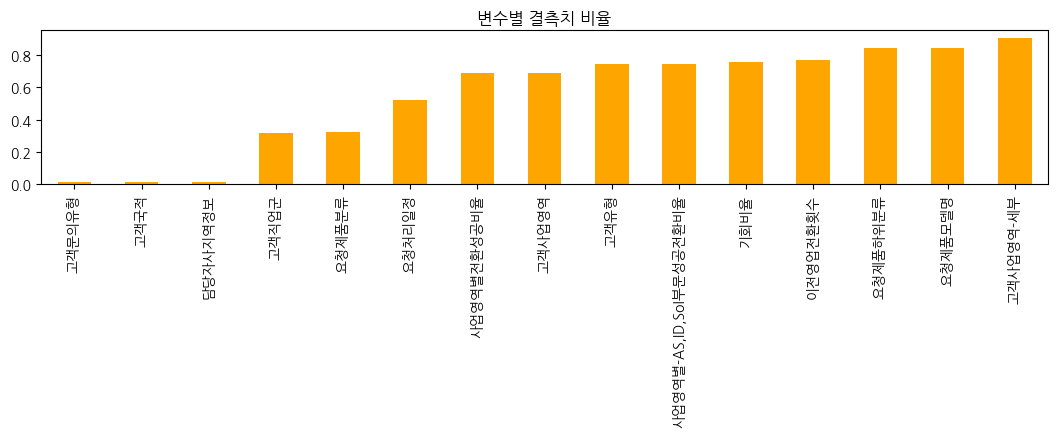

In [83]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum() / train.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

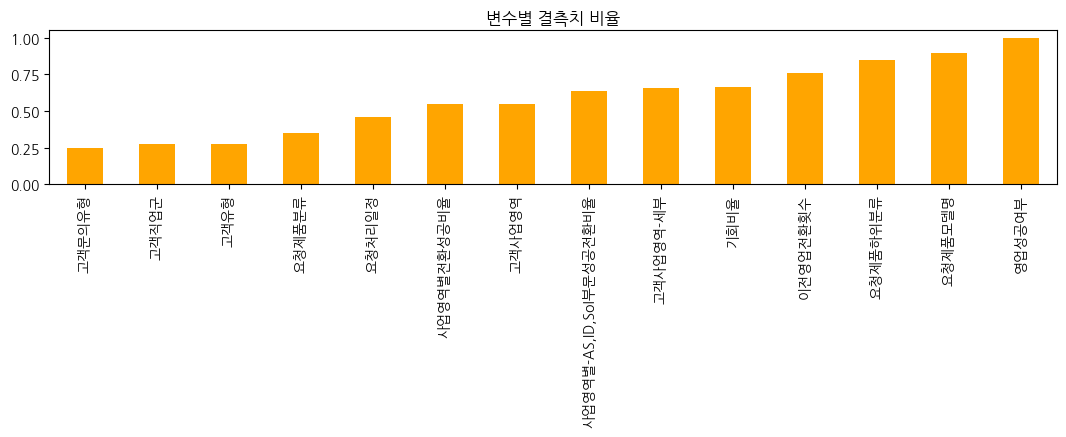

In [84]:
# 변수별 결측치의 비율을 plot으로 그려보면 아래와 같습니다.
fig = plt.figure(figsize=(13, 2))
missing = test.isnull().sum() / test.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

In [85]:
train[~train["고객사업영역"].isna()]["ID-COHA여부"].value_counts().iloc[0]

14973

In [86]:
print("ID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : %d" \
      "\nID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : %d" \
      "\nID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()]["ID-COHA여부"].value_counts().iloc[0],
          train[~train["고객사업영역"].isna()][["ID-COHA여부", "영업성공여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["ID-COHA여부", "영업성공여부"]].value_counts().iloc[1]/train[~train["고객사업영역"].isna()][["ID-COHA여부"]].value_counts().iloc[0]*100))

print("ID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : %d" \
      "\nID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : %d" \
      "\nID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()][["ID-COHA여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["ID-COHA여부", "영업성공여부"]].value_counts().iloc[3],
          train[~train["고객사업영역"].isna()][["ID-COHA여부", "영업성공여부"]].value_counts().iloc[3]/train[~train["고객사업영역"].isna()][["ID-COHA여부"]].value_counts().iloc[1]*100))

ID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : 14973
ID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : 3109
ID 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : 20.76%
ID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : 3444
ID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : 335
ID 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : 9.73%


In [87]:
print("IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : %d" \
      "\nIT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : %d" \
      "\nIT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()][["IT-COHA여부"]].value_counts().iloc[0],
          train[~train["고객사업영역"].isna()][["IT-COHA여부", "영업성공여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["IT-COHA여부", "영업성공여부"]].value_counts().iloc[1]/train[~train["고객사업영역"].isna()][["IT-COHA여부"]].value_counts().iloc[0]*100))

print("IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : %d" \
      "\nIT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : %d" \
      "\nIT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()][["IT-COHA여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["IT-COHA여부", "영업성공여부"]].value_counts().iloc[3],
          train[~train["고객사업영역"].isna()][["IT-COHA여부", "영업성공여부"]].value_counts().iloc[3]/train[~train["고객사업영역"].isna()][["IT-COHA여부"]].value_counts().iloc[1]*100))

IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : 17296
IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : 1361
IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : 7.87%
IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : 1121
IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : 13
IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : 1.16%


In [88]:
print("ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()][["ID&IT-COHA여부"]].value_counts().iloc[0],
          train[~train["고객사업영역"].isna()][["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[1]/train[~train["고객사업영역"].isna()][["ID&IT-COHA여부"]].value_counts().iloc[0]*100))

print("ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : %.2f%%"
        %(train[~train["고객사업영역"].isna()][["ID&IT-COHA여부"]].value_counts().iloc[1],
          train[~train["고객사업영역"].isna()][["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[3],
          train[~train["고객사업영역"].isna()][["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[3]/train[~train["고객사업영역"].isna()][["ID&IT-COHA여부"]].value_counts().iloc[1]*100))

ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여) : 13852
ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : 4217
ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : 30.44%
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : 4565
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : 348
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : 7.62%


<Axes: xlabel='COEHAR-EC여부', ylabel='count'>

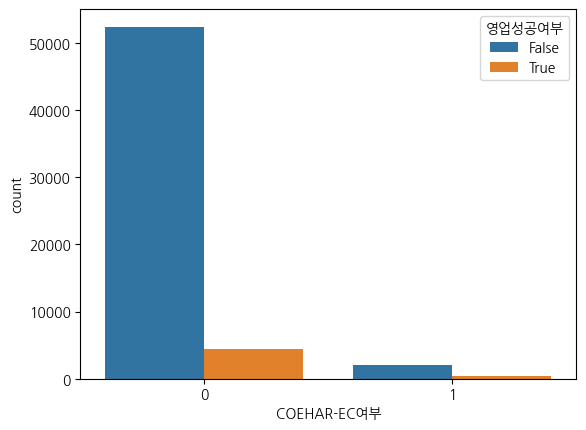

In [89]:
sns.countplot(data=train, x="COEHAR-EC여부", hue="영업성공여부")

In [90]:
print("Coporation/Office,  ,Hotal/Accommodation 외 영역 개수(가중치 0 부여) : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : %.2f%%"
        %(train[["ID&IT-COHA여부"]].value_counts().iloc[0],
          train[["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[1],
          train[["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[1]/train[["ID&IT-COHA여부"]].value_counts().iloc[0]*100))

print("ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : %d" \
      "\nID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : %.2f%%"
        %(train[["ID&IT-COHA여부"]].value_counts().iloc[1],
          train[["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[3],
          train[["ID&IT-COHA여부", "영업성공여부"]].value_counts().iloc[3]/train[["ID&IT-COHA여부"]].value_counts().iloc[1]*100))

Coporation/Office,  ,Hotal/Accommodation 외 영역 개수(가중치 0 부여) : 54734
ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 횟수 : 4502
ID, IT 부문 Coporation/Office, Hotal/Accommodation 외 영역 개수(가중치 0 부여)의 영업 성공 비율 : 8.23%
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여) : 4565
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 횟수 : 348
ID, IT 부문 Coporation/Office, Hotal/Accommodation 영역 개수(가중치 1 부여)의 영업 성공 비율 : 7.62%


<Axes: xlabel='CORHA-D여부', ylabel='count'>

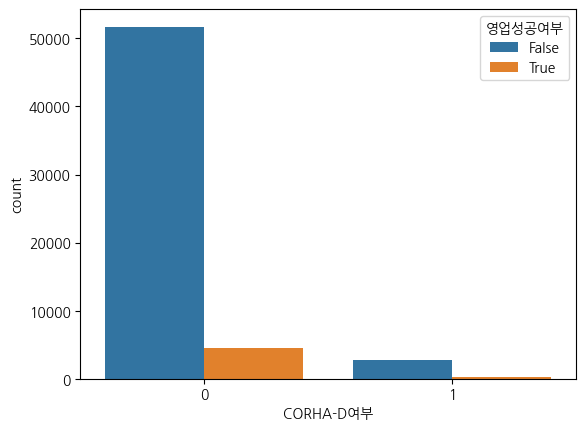

In [91]:
sns.countplot(data=train, x="CORHA-D여부", hue="영업성공여부")

<Axes: xlabel='CORHA-EC-D여부', ylabel='count'>

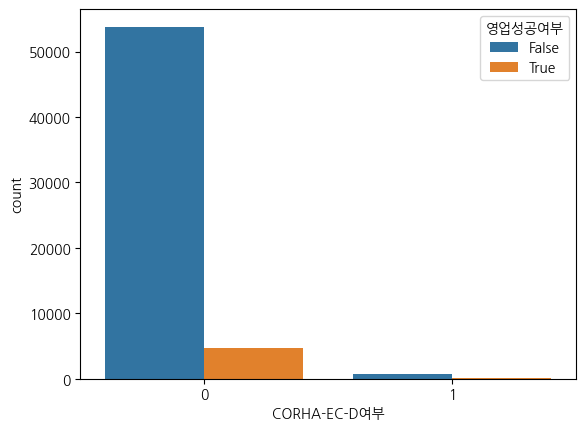

In [92]:
sns.countplot(data=train, x="CORHA-EC-D여부", hue="영업성공여부")

In [93]:
train[train["영업성공여부"]==False]["잠재고객답변길이"].mean()

74.80837113629268

In [136]:
train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts()

영업성공여부
False    14653
True      2453
Name: count, dtype: int64

In [143]:
train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts()

영업성공여부
False    14653
True      2453
Name: count, dtype: int64

In [126]:
print(train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts().iloc[0]/len(train)*100)

25.062429446173844


In [127]:
print(train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts().iloc[1]/len(train)*100)

4.195600862039476


In [128]:
print(train[train["잠재고객답변길이"]<=75]["영업성공여부"].value_counts().iloc[0]/len(train)*100)

66.86279205008039


In [129]:
print(train[train["잠재고객답변길이"]<=75]["영업성공여부"].value_counts().iloc[1]/len(train)*100)

3.8791776417062906


In [139]:
print(train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts().iloc[0]/len(train[train["잠재고객답변길이"]>75]["영업성공여부"])*100)

85.66000233836081


In [140]:
print(train[train["잠재고객답변길이"]>75]["영업성공여부"].value_counts().iloc[1]/len(train[train["잠재고객답변길이"]>75]["영업성공여부"])*100)

14.339997661639192


In [141]:
print(train[train["잠재고객답변길이"]<=75]["영업성공여부"].value_counts().iloc[0]/len(train[train["잠재고객답변길이"]<=75])*100)

94.5164410058027


In [142]:
print(train[train["잠재고객답변길이"]<=75]["영업성공여부"].value_counts().iloc[1]/len(train[train["잠재고객답변길이"]<=75])*100)

5.483558994197292


In [95]:
train[train["잠재고객답변길이"]<=75]["영업성공여부"].value_counts()

영업성공여부
False    39621
True      2303
Name: count, dtype: int64

<Axes: xlabel='영업성공여부', ylabel='잠재고객답변길이'>

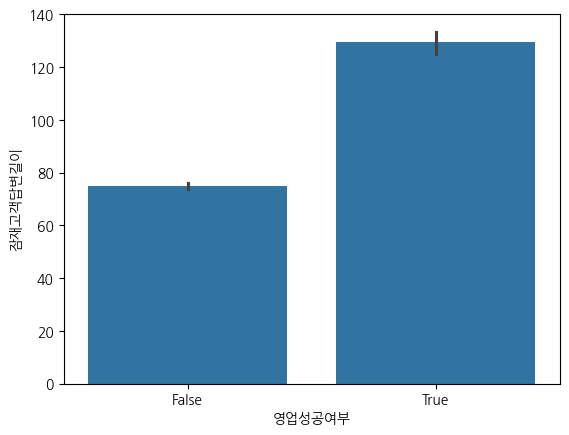

In [96]:
sns.barplot(train, x="영업성공여부", y="잠재고객답변길이")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'End-user'),
  Text(1, 0, 'Specifier/Influencer'),
  Text(2, 0, 'Service Partner'),
  Text(3, 0, 'Channel Partner'),
  Text(4, 0, 'Corporate'),
  Text(5, 0, 'Solution Eco-Partner'),
  Text(6, 0, 'Distributor'),
  Text(7, 0, 'Etc.'),
  Text(8, 0, 'System Integrator'),
  Text(9, 0, 'Consultant'),
  Text(10, 0, 'Installer'),
  Text(11, 0, 'HomeOwner'),
  Text(12, 0, 'Technician'),
  Text(13, 0, 'Installer/Contractor'),
  Text(14, 0, 'Engineer'),
  Text(15, 0, 'Manager / Director'),
  Text(16, 0, 'Developer'),
  Text(17, 0, 'Architect/Consultant'),
  Text(18, 0, 'HVAC Engineer'),
  Text(19, 0, 'Reseller'),
  Text(20, 0, 'Software/Solution Provider'),
  Text(21, 0, 'Dealer/Distributor'),
  Text(22, 0, 'Technical Assistant'),
  Text(23, 0, 'Commercial end-user'),
  Text(24, 0, 'Interior Designer'),
  Text(25, 0, 'Administrator')])

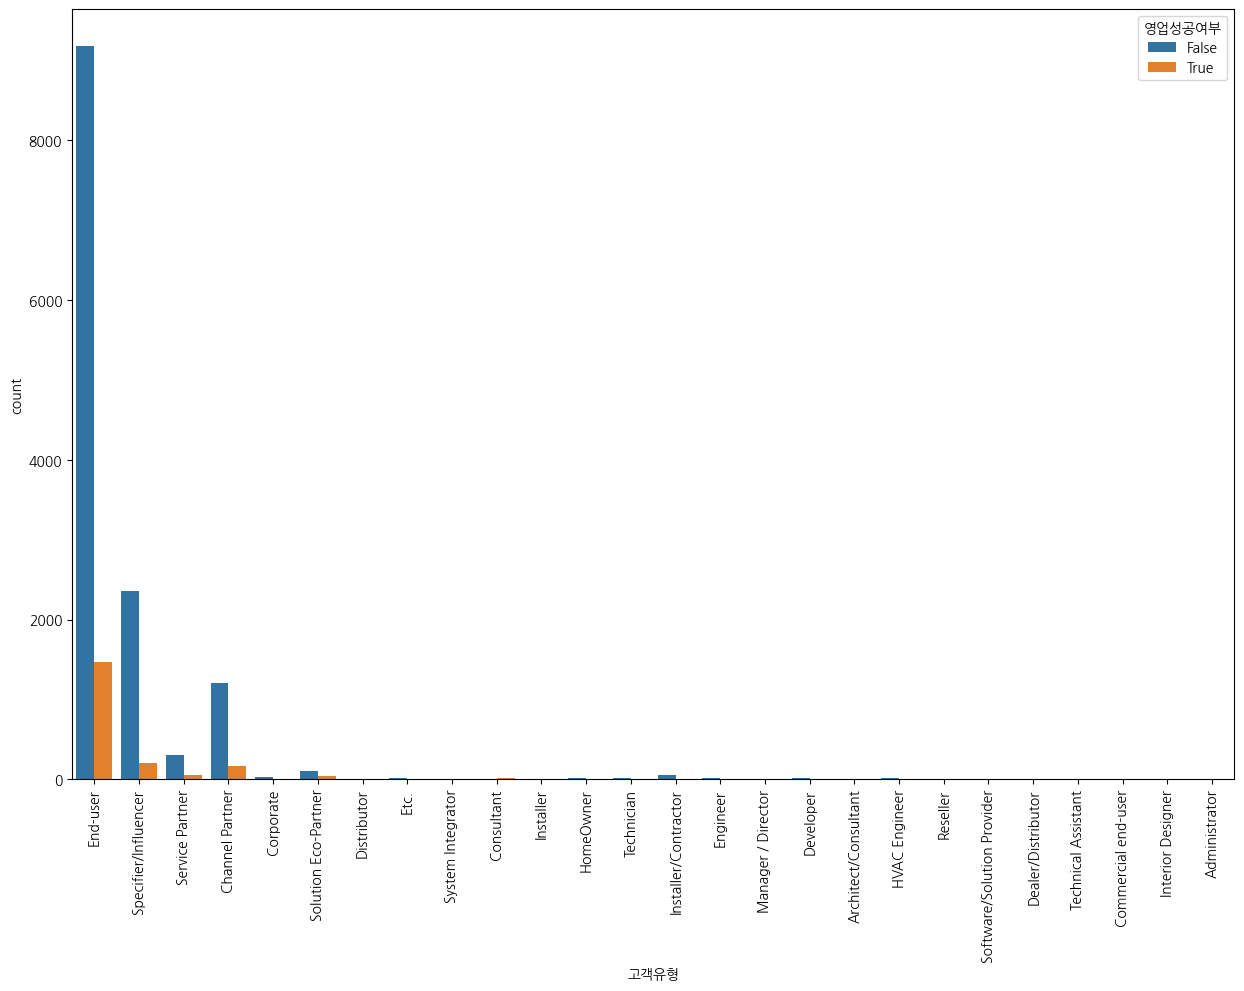

In [97]:
plt.figure(figsize=(15., 10))
sns.countplot(train, x="고객유형", hue="영업성공여부") 
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'corporate / office'),
  Text(1, 0, 'education'),
  Text(2, 0, 'hotel & accommodation'),
  Text(3, 0, 'hospital & health care'),
  Text(4, 0, 'special purpose'),
  Text(5, 0, 'residential (home)'),
  Text(6, 0, 'government department'),
  Text(7, 0, 'retail'),
  Text(8, 0, 'factory'),
  Text(9, 0, 'power plant / renewable energy'),
  Text(10, 0, 'transportation'),
  Text(11, 0, 'public facility')])

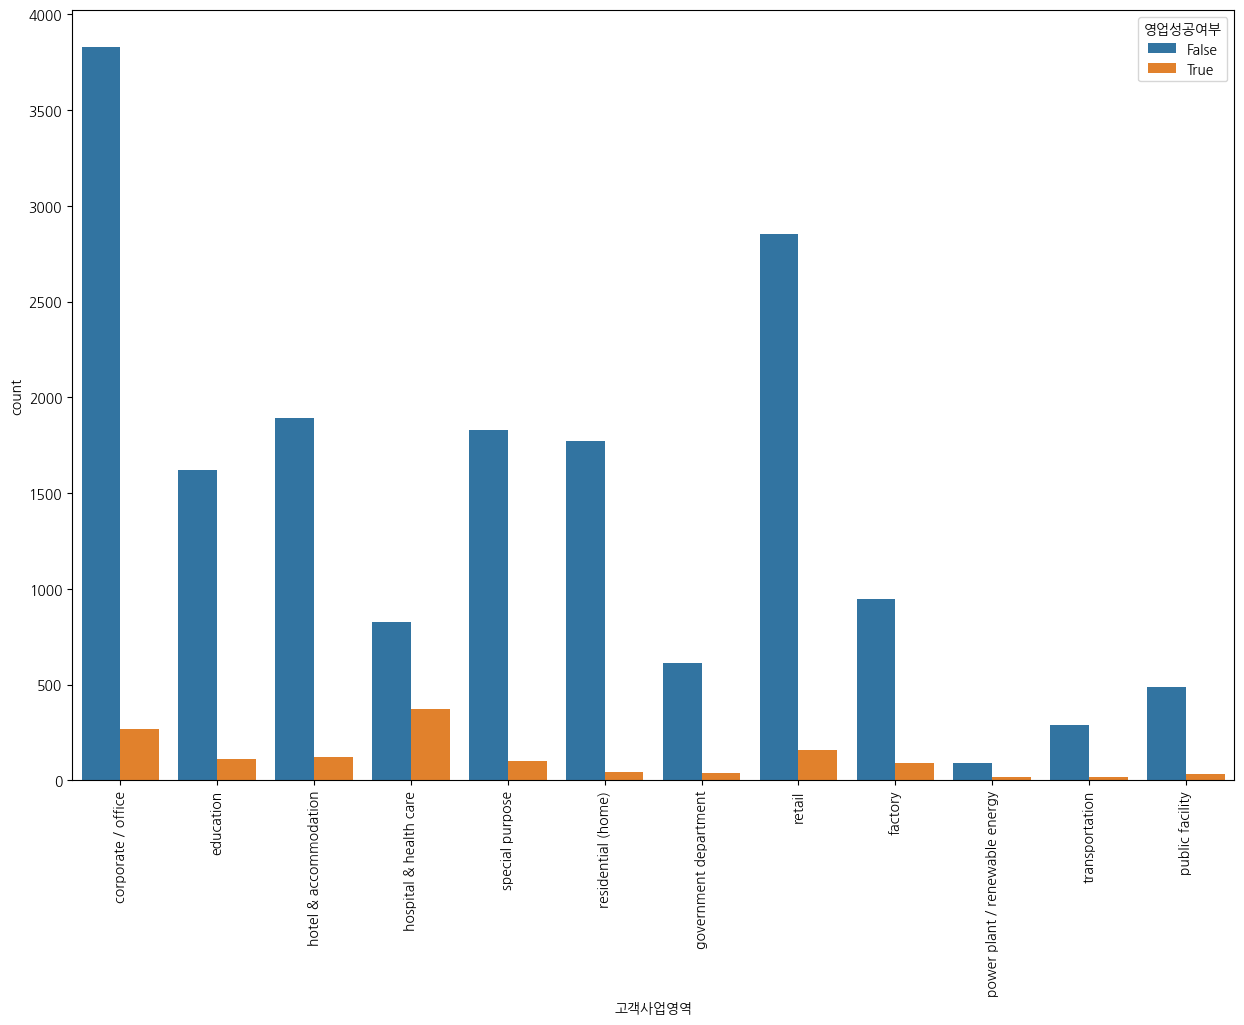

In [98]:
plt.figure(figsize=(15., 10))
sns.countplot(train, x="고객사업영역", hue="영업성공여부") 
plt.xticks(rotation=90)

<Axes: xlabel='기업유형', ylabel='count'>

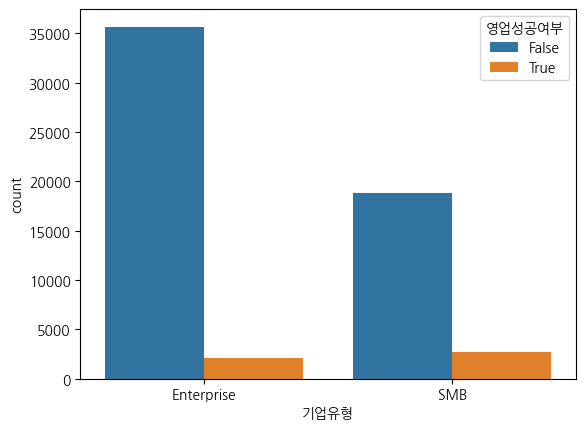

In [99]:
sns.countplot(train, x="기업유형", hue="영업성공여부")

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, 'LGEPH'),
  Text(1, 0, 'LGEIL'),
  Text(2, 0, 'LGEAF'),
  Text(3, 0, 'LGESJ'),
  Text(4, 0, 'LGESL'),
  Text(5, 0, 'LGESP'),
  Text(6, 0, 'LGEGF'),
  Text(7, 0, 'LGESA'),
  Text(8, 0, 'LGEUS'),
  Text(9, 0, 'LGECB'),
  Text(10, 0, 'LGEMS'),
  Text(11, 0, 'LGEEG'),
  Text(12, 0, 'LGEEF'),
  Text(13, 0, 'LGEAP'),
  Text(14, 0, 'LGEIN'),
  Text(15, 0, 'LGEUK'),
  Text(16, 0, 'LGEKR'),
  Text(17, 0, 'LGEPS'),
  Text(18, 0, 'LGECI'),
  Text(19, 0, 'LGECL'),
  Text(20, 0, 'LGETK'),
  Text(21, 0, 'LGELF'),
  Text(22, 0, 'LGEPT'),
  Text(23, 0, 'LGEPR'),
  Text(24, 0, 'LGEDG'),
  Text(25, 0, 'LGERO'),
  Text(26, 0, 'LGEMK'),
  Text(27, 0, 'LGEPL'),
  Text(28, 0, 'LGECZ'),
  Tex

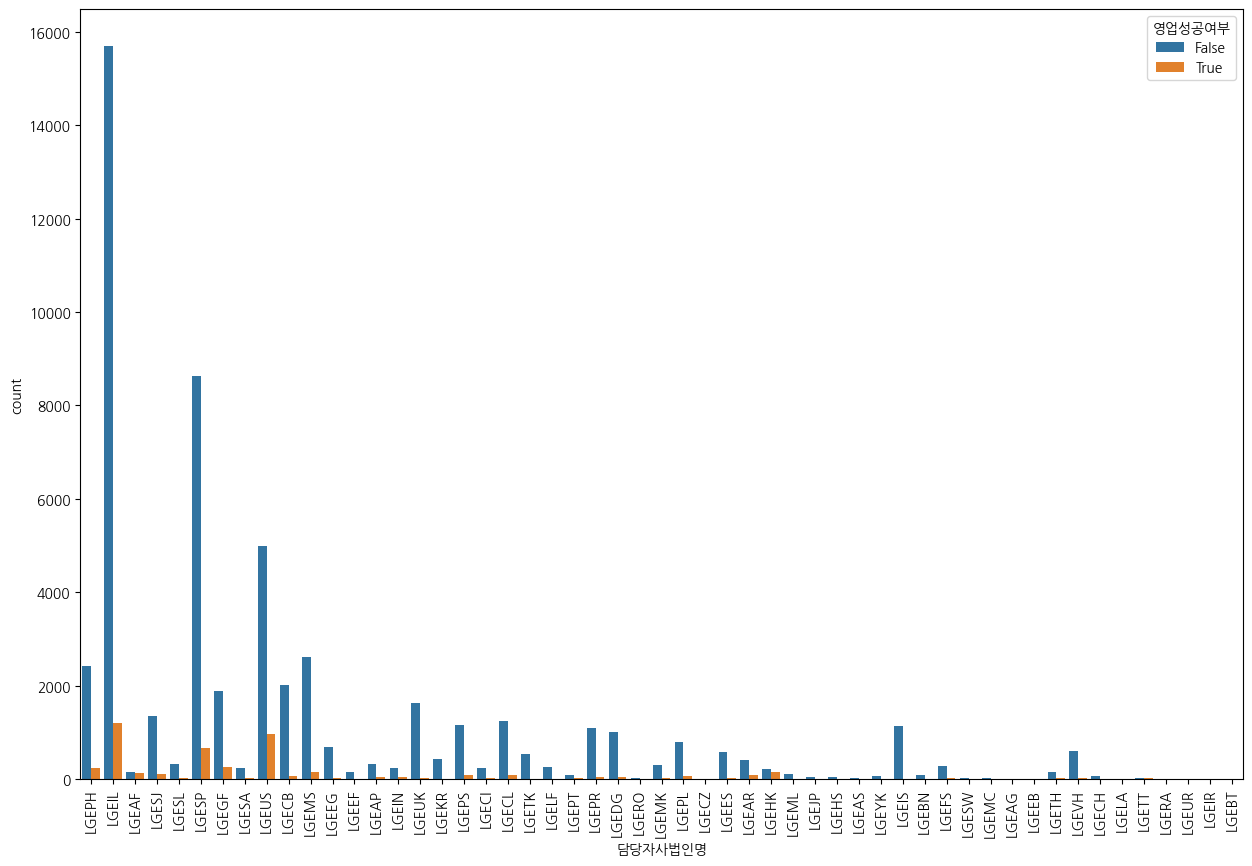

In [100]:
plt.figure(figsize=(15., 10))
sns.countplot(train, x="담당자사법인명", hue="영업성공여부") 
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116],
 [Text(0, 0, 'entry level'),
  Text(1, 0, 'ceo/founder'),
  Text(2, 0, 'partner'),
  Text(3, 0, 'manager'),
  Text(4, 0, 'vice president'),
  Text(5, 0, 'associate/analyst'),
  Text(6, 0, 'c-level executive'),
  Text(7, 0, 'none'),
  Text(8, 0, 'director'),
  Text(9, 0, 'other'),
  Text(10

/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 337 (\N{LATIN SMALL LETTER O WITH DOUBLE ACUTE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 337 (\N{LATIN SMALL LETTER O WITH DOUBLE ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


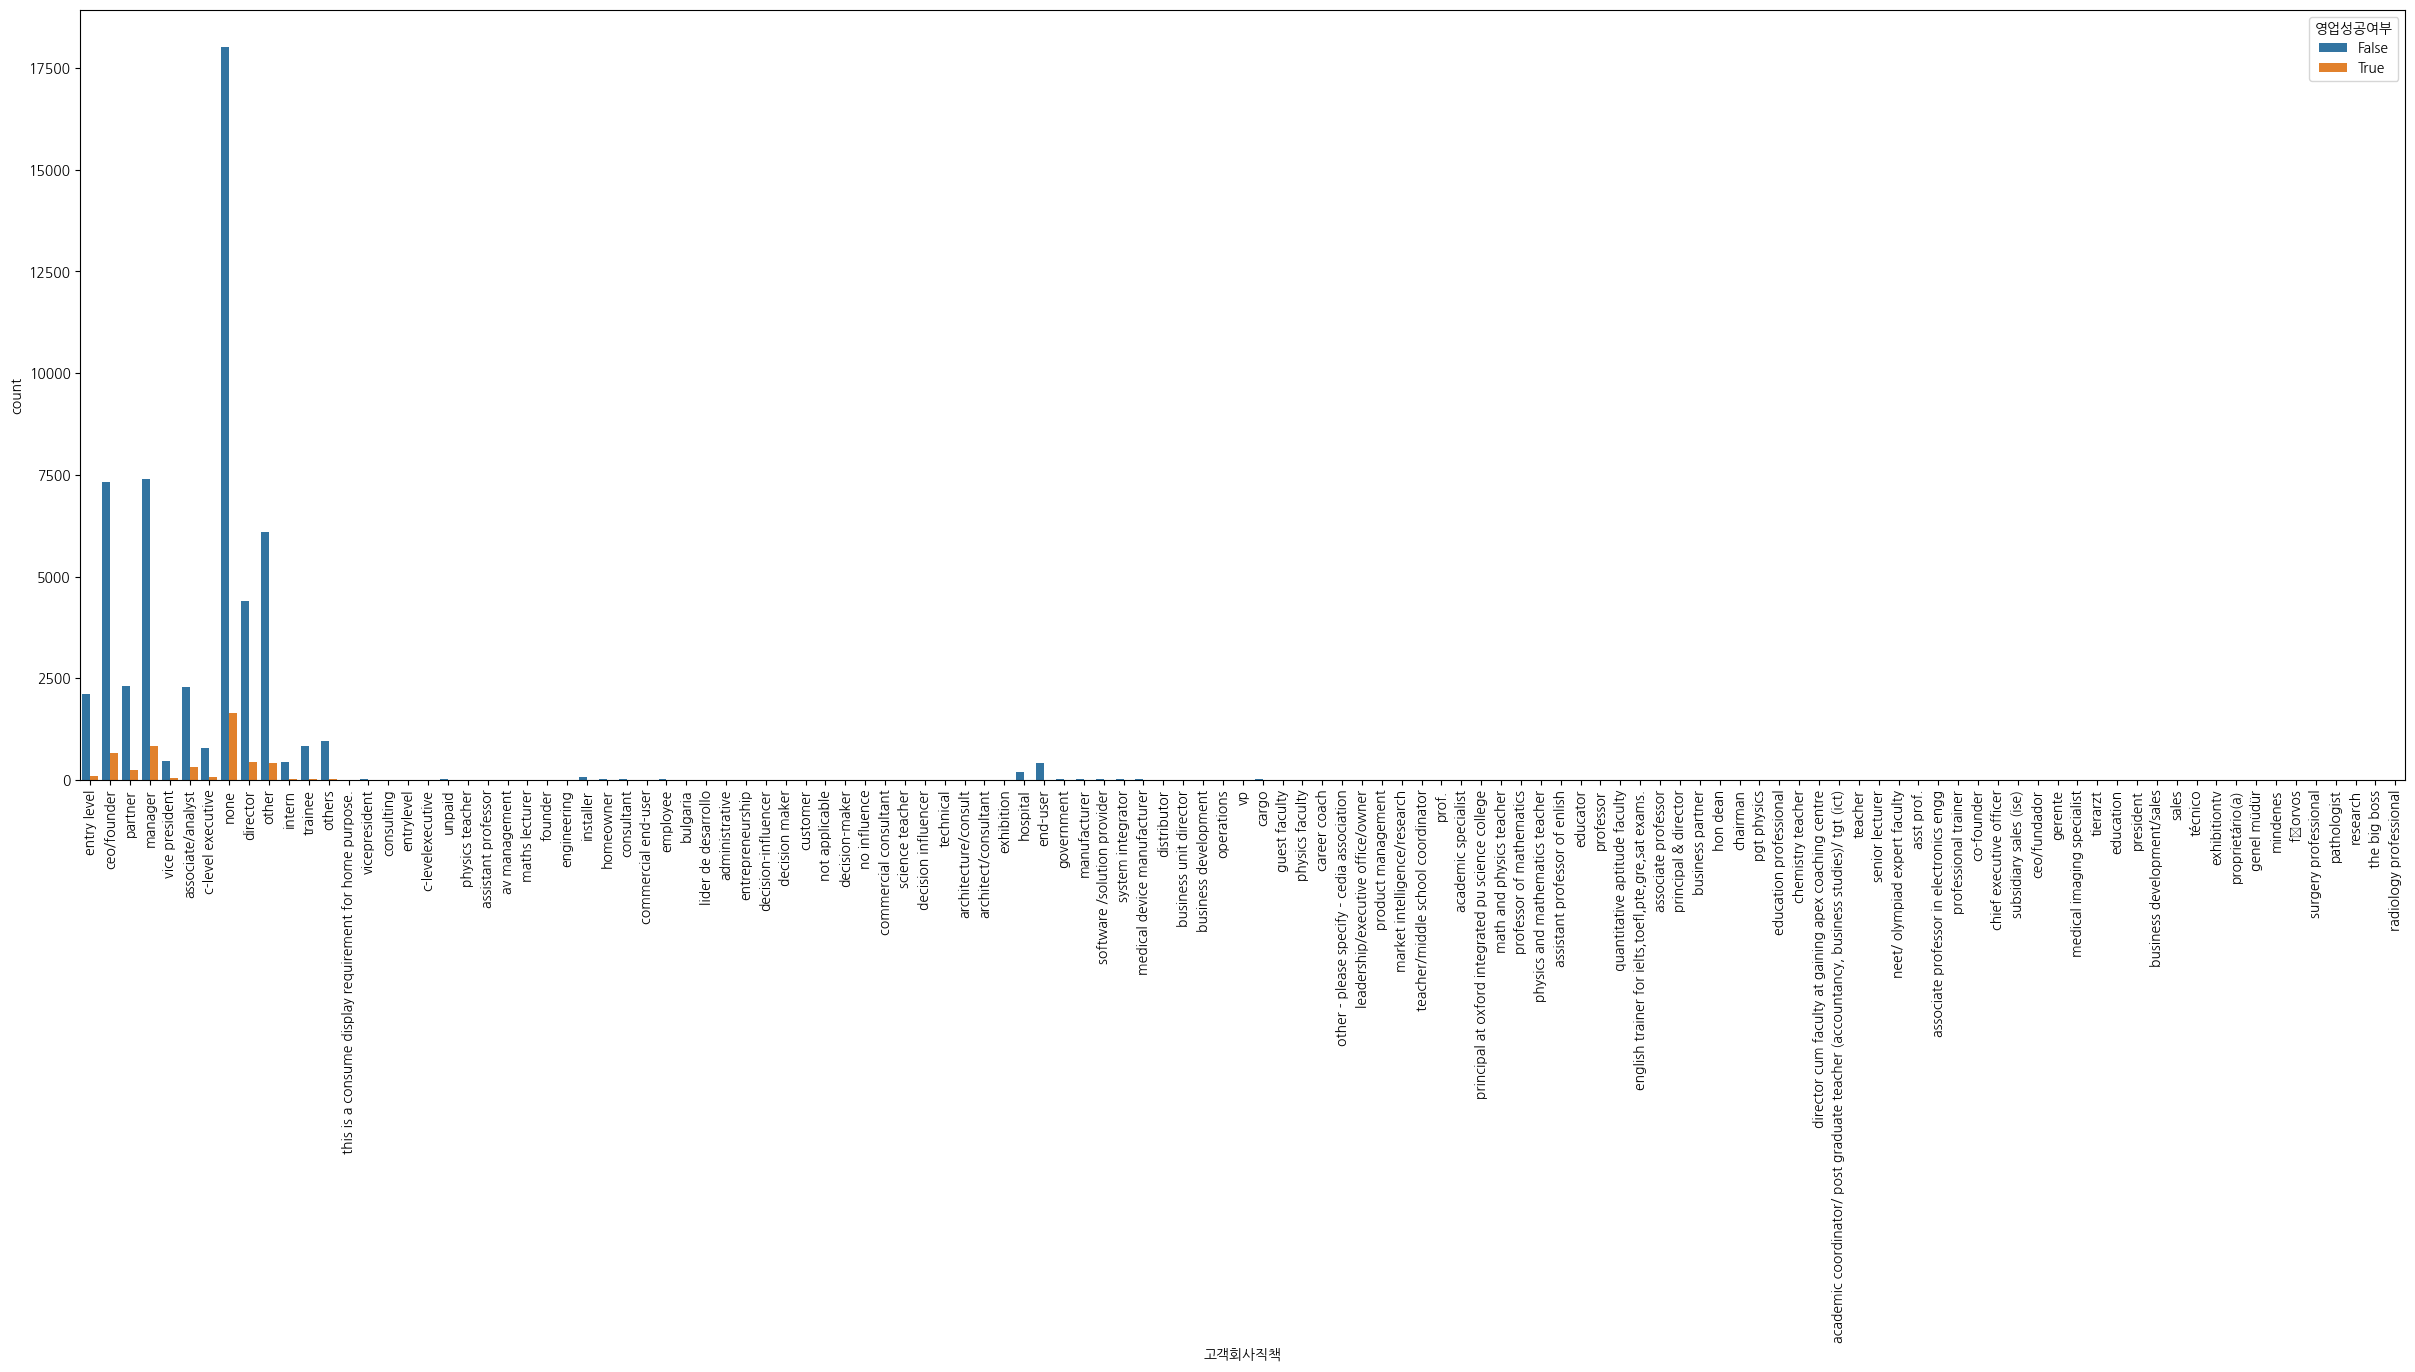

In [101]:
plt.figure(figsize=(30, 10))
sns.countplot(train, x="고객회사직책", hue="영업성공여부") 
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 369 (\N{LATIN SMALL LETTER U WITH DOUBLE ACUTE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Glyph 337 (\N{LATIN SMALL LETTER O WITH DOUBLE ACUTE}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 369 (\N{LATIN SMALL LETTER U WITH DOUBLE ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/envs/ml_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing fr

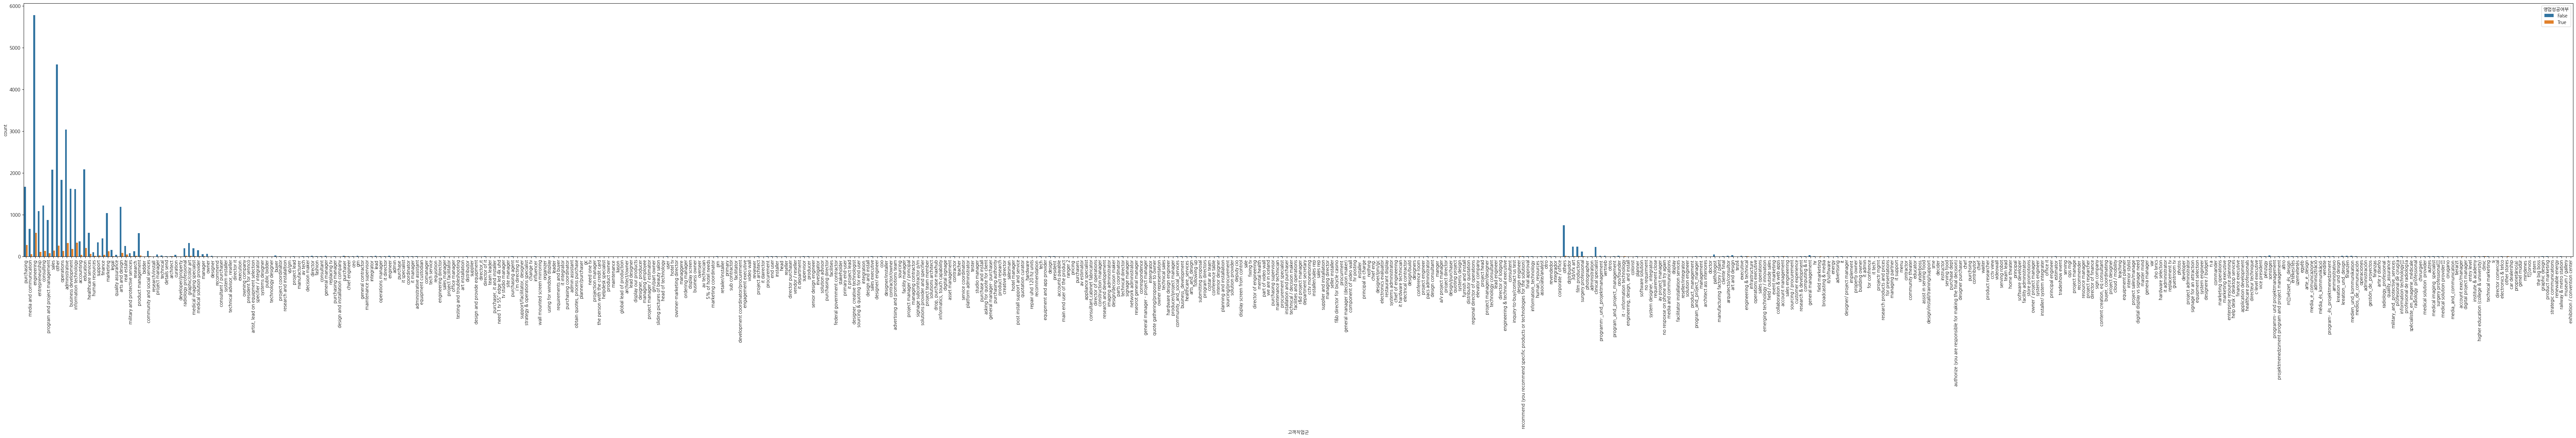

In [102]:
plt.figure(figsize=(100, 10))
sns.countplot(train, x="고객직업군", hue="영업성공여부") 
plt.xticks(rotation=90)

In [103]:
train[train["영업성공여부"]==True]["요청처리일정"]

0         less than 3 months
1         less than 3 months
2         less than 3 months
3         less than 3 months
4         less than 3 months
                ...         
59156     less than 3 months
59161     less than 3 months
59162    6 months ~ 9 months
59163    6 months ~ 9 months
59164                    NaN
Name: 요청처리일정, Length: 4850, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

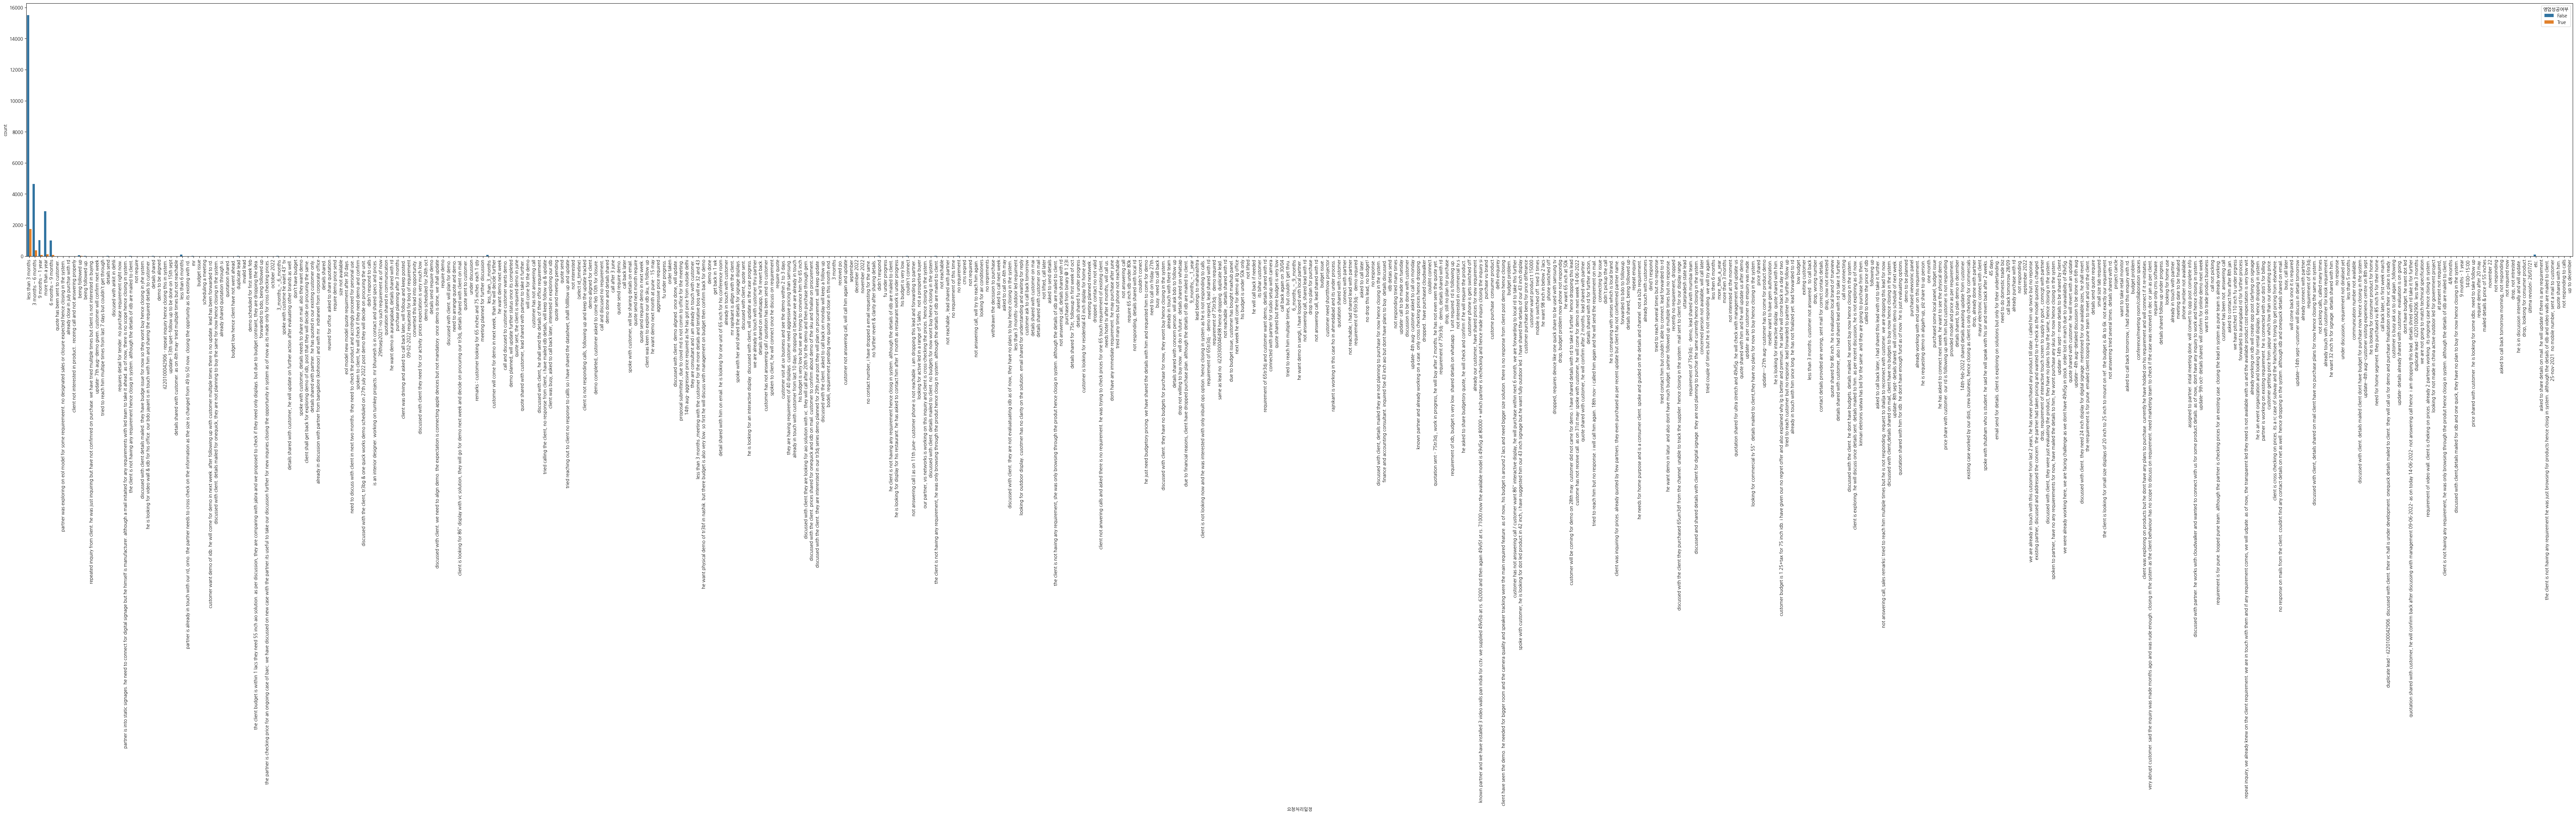

In [104]:
plt.figure(figsize=(100, 10))
sns.countplot(train, x="요청처리일정", hue="영업성공여부") 
plt.xticks(rotation=90)

In [105]:
train[train["요청처리일정"]=="less_than_3_months"]

답변비율               고객국적 사업부  기회비율  고객회사명 고객유형        기업유형  이전영업전환횟수  \
2167   1.00  /Kalaburagi/India  ID   NaN  25096  NaN  Enterprise       NaN   
2328   0.75        /Pune/India  ID   NaN  34181  NaN         SMB       NaN   
6248   1.00   /Hyderabad/India  ID   NaN  47466  NaN  Enterprise       4.0   
6249   1.00   /hyderabad/India  ID   NaN   6197  NaN         SMB       NaN   
6250   1.00   /Bangalore/India  ID   NaN   5454  NaN  Enterprise       NaN   
...     ...                ...  ..   ...    ...  ...         ...       ...   
33764  0.75       /Patna/India  ID   NaN  28778  NaN  Enterprise       NaN   
33988  0.75          /us/India  ID   NaN  14632  NaN  Enterprise       NaN   
35368  1.00      /Nashik/India  ID   NaN  47466  NaN  Enterprise       4.0   
35579  1.00   /Ahmedabad/India  ID   NaN  34988  NaN  Enterprise       NaN   
35580  1.00   /Ahmedabad/India  ID   NaN  22935  NaN  Enterprise       NaN   

       ID-COHA여부  IT-COHA여부  ...              요청처리일정 COEHAR-EC여부  CORHA-D여부  \
2167         0.0        0.0  ...  less_than_3_months           0          0   
2328         0.0        0.0  ...  less_than_3_months           0          0   
6248         0.0        0.0  ...  less_than_3_months           0          0   
6249         0.0        0.0  ...  less_than_3_months           0          0   
6250         0.0        0.0  ...  less_than_3_months           0          0   
...          ...        ...  ...                 ...         ...        ...   
33764        0.0        0.0  ...  less_than_3_months           0          0   
33988        0.0        0.0  ...  less_than_3_months           0          0   
35368        0.0        0.0  ...  less_than_3_months           0          0   
35579        0.0        0.0  ...  less_than_3_months           0          0   
35580        0.0        0.0  ...  less_than_3_months           0          0   

      사업영역별전환성공비율 사업영역별-AS,ID,Sol부문성공전환비율 고객사업영역 고객사업영역-세부 영업담당자 영업성공여부  \
2167          NaN                     NaN    NaN       NaN   183   True   
2328          NaN                     NaN    NaN       NaN   148   True   
6248          NaN                     NaN    NaN       NaN   254  False   
6249          NaN                     NaN    NaN       NaN   174  False   
6250          NaN                     NaN    NaN       NaN   174  False   
...           ...                     ...    ...       ...   ...    ...   
33764         NaN                     NaN    NaN       NaN   174  False   
33988         NaN                     NaN    NaN       NaN   174  False   
35368         NaN                     NaN    NaN       NaN   174  False   
35579         NaN                     NaN    NaN       NaN   174  False   
35580         NaN                     NaN    NaN       NaN   174  False   

      CORHA-EC-D여부  
2167             0  
2328             0  
6248             0  
6249             0  
6250             0  
...            ...  
33764            0  
33988            0  
35368            0  
35579            0  
35580            0  

[76 rows x 30 columns]

In [106]:
train[train["요청처리일정"].isin(['less than 3 months', '3 months ~ 6 months', 'more than a year',
       '9 months ~ 1 year', '6 months ~ 9 months', 'less than 6 months', 'etc.'])]

답변비율                      고객국적       사업부      기회비율  고객회사명  \
0      1.00  /Quezon City/Philippines        AS  0.066667  32160   
1      1.00        /PH-00/Philippines        AS  0.066667  23122   
2      1.00           /Kolkata /India        AS  0.088889   1755   
3      1.00        /Bhubaneswar/India        AS  0.088889   4919   
4      1.00          /Hyderabad/India        AS  0.088889  17126   
...     ...                       ...       ...       ...    ...   
59294  1.00           /Sląskie/Poland        AS       NaN  33747   
59295  0.75      /Bogotá DC /Colombia        AS  0.040000  35420   
59296  0.75               /Pisco/Peru        AS  0.040000  19249   
59297  1.00  /santa cruz bolivia/Peru        AS  0.040000  40327   
59298  0.75             /paris/France  Solution       NaN  30268   

                       고객유형        기업유형  이전영업전환횟수  ID-COHA여부  IT-COHA여부  ...  \
0                  End-user  Enterprise       NaN        0.0        0.0  ...   
1                  End-user  Enterprise      12.0        0.0        0.0  ...   
2                  End-user  Enterprise     144.0        0.0        0.0  ...   
3                  End-user  Enterprise       NaN        0.0        0.0  ...   
4      Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
...                     ...         ...       ...        ...        ...  ...   
59294              End-user         SMB       NaN        0.0        0.0  ...   
59295  Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
59296  Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
59297                   NaN  Enterprise       NaN        0.0        0.0  ...   
59298                   NaN  Enterprise       NaN        0.0        0.0  ...   

                    요청처리일정 COEHAR-EC여부  CORHA-D여부 사업영역별전환성공비율  \
0       less than 3 months           1          0    0.003079   
1       less than 3 months           1          0    0.003079   
2       less than 3 months           1          0    0.003079   
3       less than 3 months           1          0    0.003079   
4       less than 3 months           0          0    0.003079   
...                    ...         ...        ...         ...   
59294  3 months ~ 6 months           0          0    0.000026   
59295    9 months ~ 1 year           0          0    0.000026   
59296   less than 3 months           0          0    0.000026   
59297     more than a year           0          0    0.000026   
59298   less than 3 months           0          0    0.000026   

      사업영역별-AS,ID,Sol부문성공전환비율              고객사업영역     고객사업영역-세부 영업담당자 영업성공여부  \
0                    0.026846  corporate / office   Engineering     0   True   
1                    0.026846  corporate / office   Advertising     1   True   
2                    0.026846  corporate / office  Construction     2   True   
3                    0.026846  corporate / office   IT/Software     3   True   
4                    0.026846  corporate / office           NaN     4   True   
...                       ...                 ...           ...   ...    ...   
59294                0.028777     public facility        Others   694  False   
59295                0.028777     public facility           NaN    39  False   
59296                0.028777     public facility           NaN   125  False   
59297                0.028777     public facility           NaN   134  False   
59298                     NaN     public facility           NaN   441  False   

      CORHA-EC-D여부  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
59294            0  
59295            0  
59296            0  
59297            0  
59298            0  

[27701 rows x 30 columns]

In [107]:
test

id  답변비율                                               고객국적 사업부  \
0     19844  0.00                                        /  / Brazil  ID   
1      9738  0.25  400 N State Of Franklin Rd  Cloud IT / Johnson...  IT   
2      8491  1.00                                         /  / U.A.E  ID   
3     19895  0.50                         / Madison  / United States  ID   
4     10465  1.00                               / Sao Paulo / Brazil  ID   
...     ...   ...                                                ...  ..   
5266  13855  0.50                                  /São Paulo/Brazil  AS   
5267   7979  0.25                         General /  / United States  IT   
5268  12887  0.75                             / OURO BRANCO / Brazil  AS   
5269  17530  0.00                                       /  / Germany  IT   
5270   4330  0.25                                  / Ongole  / India  AS   

          기회비율  고객회사명                   고객유형        기업유형  이전영업전환횟수  ID-COHA여부  \
0     0.073248  47466           End Customer  Enterprise      53.0        0.0   
1          NaN   5405           End Customer         SMB       NaN        0.0   
2          NaN  13597  Specifier/ Influencer         SMB       NaN        0.0   
3     0.118644  17204                    NaN  Enterprise       NaN        0.0   
4     0.074949   2329           End Customer  Enterprise       2.0        1.0   
...        ...    ...                    ...         ...       ...        ...   
5266       NaN  40292                    NaN  Enterprise      10.0        0.0   
5267       NaN  47466                    NaN  Enterprise       0.0        0.0   
5268       NaN  46227  Specifier/ Influencer  Enterprise       NaN        0.0   
5269       NaN  45667           End Customer         SMB       NaN        0.0   
5270       NaN  23646           End Customer  Enterprise       NaN        0.0   

      ...  담당자사법인명              요청처리일정 COEHAR-EC여부  CORHA-D여부 사업영역별전환성공비율  \
0     ...    LGESP                 NaN           1          0    0.001183   
1     ...    LGEUS                 NaN           0          0    0.000013   
2     ...    LGEGF  less than 3 months           0          0    0.000060   
3     ...    LGEUS    more than a year           0          0    0.001183   
4     ...    LGESP  less than 3 months           1          1    0.003079   
...   ...      ...                 ...         ...        ...         ...   
5266  ...    LGESP                 NaN           0          0         NaN   
5267  ...    LGEUS                 NaN           0          0         NaN   
5268  ...    LGESP  less than 3 months           0          0         NaN   
5269  ...    LGEDG                 NaN           0          0         NaN   
5270  ...    LGEIL                 NaN           0          0         NaN   

     사업영역별-AS,ID,Sol부문성공전환비율                  고객사업영역            고객사업영역-세부  \
0                   0.049840                  retail  Electronics & Telco   
1                        NaN          transportation               Others   
2                   0.131148  hospital & health care     General Hospital   
3                   0.049840                  retail                  NaN   
4                   0.064566      corporate / office          Engineering   
...                      ...                     ...                  ...   
5266                     NaN                     NaN                  NaN   
5267                     NaN                     NaN                  NaN   
5268                     NaN                     NaN                  NaN   
5269                     NaN                     NaN                  NaN   
5270                     NaN                     NaN                  NaN   

     영업담당자 영업성공여부  
0      278    NaN  
1      437    NaN  
2      874    NaN  
3      194    NaN  
4      167    NaN  
...    ...    ...  
5266    97    NaN  
5267   438    NaN  
5268    97    NaN  
5269   429    NaN  
5270     4    NaN  

[5271 rows x 30 columns]

In [108]:
test["요청처리일정"].unique()

array([nan, 'less than 3 months', 'more than a year',
       '6 months ~ 9 months', '3 months ~ 6 months', '9 months ~ 1 year'],
      dtype=object)

In [109]:
train["요청처리일정"].value_counts().head(50)

요청처리일정
less than 3 months                                                                                                                                             17250
3 months ~ 6 months                                                                                                                                             5026
more than a year                                                                                                                                                3023
9 months ~ 1 year                                                                                                                                               1101
6 months ~ 9 months                                                                                                                                             1098
less than 6 months                                                                                                                                               108
etc

In [110]:
train.loc[(train["요청처리일정"]=="less_than_3_months") | 
          (train["요청처리일정"]=="less than 3 months. customer not answered . to call back") |
          (train["요청처리일정"]=="less than 3 months- outdoor led requiment") |
          (train["요청처리일정"]=="3 months") |
          (train["요청처리일정"]=="less than 3 months ,meeting with the customer for the more details and tentative boq will ne 32 and 43") |
          (train["요청처리일정"]=="duplicate lead - il220100042906. less than 3 months"), "요청처리일정"] = "less than 3 months"
train.loc[train["요청처리일정"]=="3_months_~_6_months", "요청처리일정"] = "3 months ~ 6 months"
train.loc[train["요청처리일정"]== "more_than_a_year", "요청처리일정"] = "more than a year"
train.loc[(train["요청처리일정"]== "9_months_~_1_year") |
          (train["요청처리일정"]== "9 months - 1 year"), "요청처리일정"] = "9 months ~ 1 year"
train.loc[train["요청처리일정"]== "6_months_~_9_months", "요청처리일정"] = "6 months ~ 9 months"


In [114]:
train["요청처리일정"].fillna("Etc", inplace=True)
test["요청처리일정"].fillna("Etc", inplace=True)

In [116]:
train = train[train["요청처리일정"].isin(test["요청처리일정"].unique())]

In [117]:
train

답변비율                      고객국적       사업부      기회비율  고객회사명  \
0      1.00  /Quezon City/Philippines        AS  0.066667  32160   
1      1.00        /PH-00/Philippines        AS  0.066667  23122   
2      1.00           /Kolkata /India        AS  0.088889   1755   
3      1.00        /Bhubaneswar/India        AS  0.088889   4919   
4      1.00          /Hyderabad/India        AS  0.088889  17126   
...     ...                       ...       ...       ...    ...   
59294  1.00           /Sląskie/Poland        AS       NaN  33747   
59295  0.75      /Bogotá DC /Colombia        AS  0.040000  35420   
59296  0.75               /Pisco/Peru        AS  0.040000  19249   
59297  1.00  /santa cruz bolivia/Peru        AS  0.040000  40327   
59298  0.75             /paris/France  Solution       NaN  30268   

                       고객유형        기업유형  이전영업전환횟수  ID-COHA여부  IT-COHA여부  ...  \
0                  End-user  Enterprise       NaN        0.0        0.0  ...   
1                  End-user  Enterprise      12.0        0.0        0.0  ...   
2                  End-user  Enterprise     144.0        0.0        0.0  ...   
3                  End-user  Enterprise       NaN        0.0        0.0  ...   
4      Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
...                     ...         ...       ...        ...        ...  ...   
59294              End-user         SMB       NaN        0.0        0.0  ...   
59295  Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
59296  Specifier/Influencer  Enterprise       NaN        0.0        0.0  ...   
59297                   NaN  Enterprise       NaN        0.0        0.0  ...   
59298                   NaN  Enterprise       NaN        0.0        0.0  ...   

                    요청처리일정 COEHAR-EC여부  CORHA-D여부 사업영역별전환성공비율  \
0       less than 3 months           1          0    0.003079   
1       less than 3 months           1          0    0.003079   
2       less than 3 months           1          0    0.003079   
3       less than 3 months           1          0    0.003079   
4       less than 3 months           0          0    0.003079   
...                    ...         ...        ...         ...   
59294  3 months ~ 6 months           0          0    0.000026   
59295    9 months ~ 1 year           0          0    0.000026   
59296   less than 3 months           0          0    0.000026   
59297     more than a year           0          0    0.000026   
59298   less than 3 months           0          0    0.000026   

      사업영역별-AS,ID,Sol부문성공전환비율              고객사업영역     고객사업영역-세부 영업담당자 영업성공여부  \
0                    0.026846  corporate / office   Engineering     0   True   
1                    0.026846  corporate / office   Advertising     1   True   
2                    0.026846  corporate / office  Construction     2   True   
3                    0.026846  corporate / office   IT/Software     3   True   
4                    0.026846  corporate / office           NaN     4   True   
...                       ...                 ...           ...   ...    ...   
59294                0.028777     public facility        Others   694  False   
59295                0.028777     public facility           NaN    39  False   
59296                0.028777     public facility           NaN   125  False   
59297                0.028777     public facility           NaN   134  False   
59298                     NaN     public facility           NaN   441  False   

      CORHA-EC-D여부  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
59294            0  
59295            0  
59296            0  
59297            0  
59298            0  

[58466 rows x 30 columns]

In [48]:
train["요청처리일정"].unique()

array(['less than 3 months', 'bad response', '3 months ~ 6 months',
       '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months'],
      dtype=object)

In [49]:
train["요청처리일정"].isna().sum()

0

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'less than 3 months'),
  Text(1, 0, 'Etc'),
  Text(2, 0, '3 months ~ 6 months'),
  Text(3, 0, '9 months ~ 1 year'),
  Text(4, 0, 'more than a year'),
  Text(5, 0, '6 months ~ 9 months')])

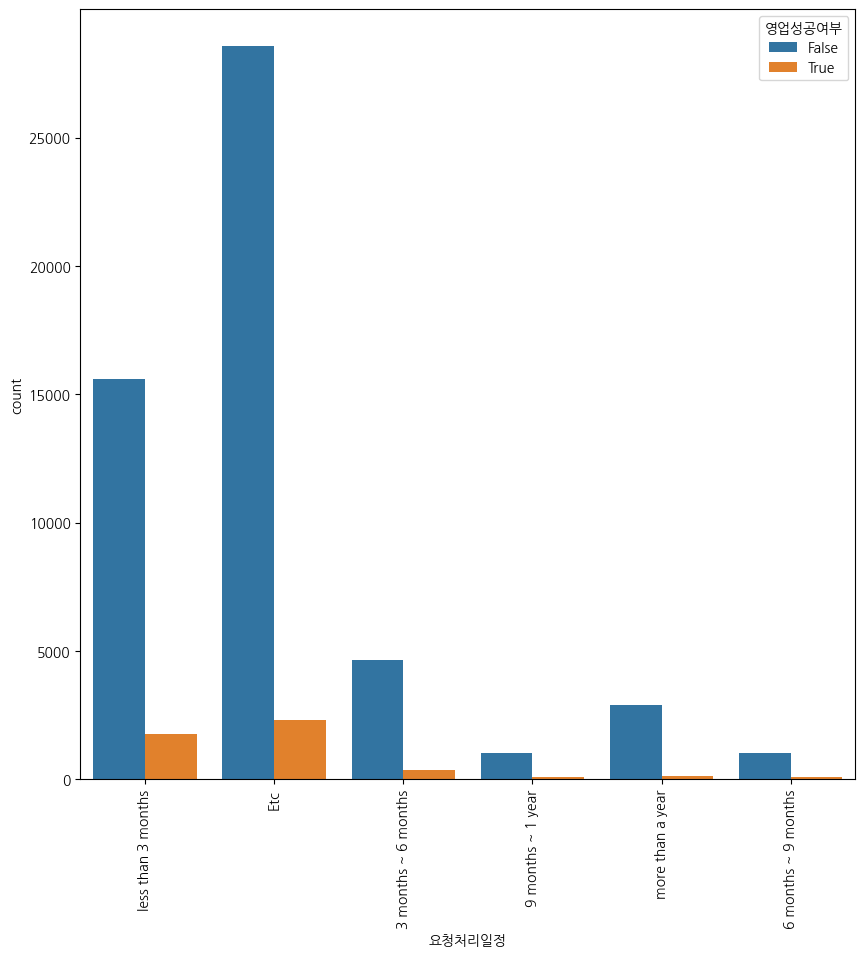

In [118]:
plt.figure(figsize=(10, 10))
sns.countplot(train, x="요청처리일정", hue="영업성공여부") 
plt.xticks(rotation=90)

In [67]:
print("bad response : %f" %(train[train["영업성공여부"]==True]["요청처리일정"].value_counts().loc["bad response"]/train["요청처리일정"].value_counts().loc["bad response"] * 100))
print("less than 3 months : %f" %(train[train["영업성공여부"]==True]["요청처리일정"].value_counts().loc["less than 3 months"]/train["요청처리일정"].value_counts().loc["less than 3 months"] * 100))
print("3 months ~ 6 months : %f" %(train[train["영업성공여부"]==True]["요청처리일정"].value_counts().loc["3 months ~ 6 months"]/train["요청처리일정"].value_counts().loc["3 months ~ 6 months"]* 100))
print("9 months ~ 1 year : %f" %(train[train["영업성공여부"]==True]["요청처리일정"].value_counts().loc["9 months ~ 1 year"]/train["요청처리일정"].value_counts().loc["9 months ~ 1 year"]* 100))
print("6 months ~ 9 months : %f" %(train[train["영업성공여부"]==True]["요청처리일정"].value_counts().loc["6 months ~ 9 months"]/train["요청처리일정"].value_counts().loc["6 months ~ 9 months"]* 100))


bad response : 7.657118
less than 3 months : 10.132133
3 months ~ 6 months : 7.606753
9 months ~ 1 year : 7.129964
6 months ~ 9 months : 7.350272
